# Project - Employee Attrition Analytics
### Group : DS3
### Members Name
1. Aditya 
2. Ishita 
3. Minhal
4. Manorma
5. Anushka 

In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# To show full coulumns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
import datetime
from dateutil.relativedelta import relativedelta
from datetime import date

In [3]:
# Loading Data files
df1 = pd.read_excel('staff utlz latest 16-17_masked.xlsx', header = 1)
df2 = pd.read_excel('staff utlz latest 17-18_masked.xlsx', header = 1)

# Termination File
dft = pd.read_excel("Terminations 15-18.xlsx")

In [4]:
df1.head()

,Employee No,Profit Center,Employee Name,Employee Position,Employee Location,People Group,Employee Category,Supervisor name,Join Date,Current Status,Termination Date,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Utilization%,Total Hours.1,Total Available Hours.1,Work Hours.1,Leave Hours.1,Training Hours.1,BD Hours.1,NC Hours.1,Utilization%.1,Total Hours.2,Total Available Hours.2,Work Hours.2,Leave Hours.2,Training Hours.2,BD Hours.2,NC Hours.2,Utilization%.2,Total Hours.3,Total Available Hours.3,Work Hours.3,Leave Hours.3,Training Hours.3,BD Hours.3,NC Hours.3,Utilization%.3,Total Hours.4,Total Available Hours.4,Work Hours.4,Leave Hours.4,Training Hours.4,BD Hours.4,NC Hours.4,Utilization%.4,Total Hours.5,Total Available Hours.5,Work Hours.5,Leave Hours.5,Training Hours.5,BD Hours.5,NC Hours.5,Utilization%.5,Total Hours.6,Total Available Hours.6,Work Hours.6,Leave Hours.6,Training Hours.6,BD Hours.6,NC Hours.6,Utilization%.6,Total Hours.7,Total Available Hours.7,Work Hours.7,Leave Hours.7,Training Hours.7,BD Hours.7,NC Hours.7,Utilization%.7,Total Hours.8,Total Available Hours.8,Work Hours.8,Leave Hours.8,Training Hours.8,BD Hours.8,NC Hours.8,Utilization%.8,Total Hours.9,Total Available Hours.9,Work Hours.9,Leave Hours.9,Training Hours.9,BD Hours.9,NC Hours.9,Utilization%.9,Total Hours.10,Total Available Hours.10,Work Hours.10,Leave Hours.10,Training Hours.10,BD Hours.10,NC Hours.10,Utilization%.10,Total Hours.11,Total Available Hours.11,Work Hours.11,Leave Hours.11,Training Hours.11,BD Hours.11,NC Hours.11,Utilization%.11,Total Hours.12,Total Available Hours.12,Work Hours.12,Leave Hours.12,Training Hours.12,BD Hours.12,NC Hours.12,Utilization%.12
0,1,PC - 1,Rochette Jilleen,Level 2,Location 3,Client Service Staff,Level 1/2,Idalina Lauraine,2000-09-30,Active,-,168.0,160.0,55.0,8.0,0.0,102.0,0.0,0.34375,176.0,168.0,32.0,8.0,0.0,168.0,8.0,0.190476,176.0,152.0,12.0,24.0,0.0,44.0,0.0,0.078947,168.0,134.0,69.0,32.0,2.0,153.0,24.0,0.514925,184.0,168.0,20.0,16.0,0.0,84.0,0.0,0.119048,176.0,116.0,65.0,28.0,32.0,123.0,0.0,0.560345,168.0,150.0,53.0,12.0,6.0,91.0,0.0,0.353333,176.0,152.0,37.0,24.0,0.0,59.0,0.0,0.243421,176.0,136.0,84.0,40.0,0.0,126.0,0.0,0.617647,176.0,144.0,68.0,8.0,24.0,67.0,0.0,0.472222,160.0,147.0,49.0,8.0,5.0,114.0,0.0,0.333333,184.0,175.0,92.0,8.0,1.0,61.0,24.0,0.525714,2088.0,1802.0,636.0,216.0,70.0,1192.0,56.0,0.352941
1,2,PC - 2,Daryl Natalina,Level 2,Location 7,Client Service Staff,Level 1/2,Idalina Lauraine,1999-05-31,Active,-,168.0,152.0,54.0,8.0,8.0,44.0,74.0,0.355263,176.0,152.0,24.0,24.0,0.0,65.0,67.0,0.157895,176.0,172.0,86.0,4.0,0.0,47.0,50.0,0.5,168.0,144.0,27.0,8.0,16.0,63.0,79.0,0.1875,184.0,168.0,34.0,16.0,0.0,68.0,70.0,0.202381,176.0,138.0,26.0,12.0,26.0,61.0,66.5,0.188406,168.0,160.0,11.0,8.0,0.0,87.0,66.0,0.06875,176.0,160.0,28.0,16.0,0.0,70.0,73.0,0.175,176.0,136.0,54.0,40.0,0.0,41.0,41.0,0.397059,176.0,164.0,29.0,12.0,0.0,67.0,70.0,0.176829,160.0,152.0,0.0,8.0,0.0,76.0,76.0,0.0,184.0,184.0,182.5,0.0,0.0,5.0,1.5,0.991848,2088.0,1882.0,555.5,156.0,50.0,694.0,734.0,0.295165
2,3,PC - 2,Annnora Gabrielle,Level 2,Location 7,Client Service Staff,Level 1/2,Idalina Lauraine,2001-01-31,Active,-,168.0,144.0,59.0,16.0,8.0,43.0,60.0,0.409722,176.0,184.0,52.5,-8.0,0.0,69.5,62.0,0.285326,176.0,168.0,43.0,8.0,0.0,61.0,64.0,0.255952,168.0,167.0,85.0,0.0,1.0,30.5,61.5,0.508982,184.0,160.0,119.0,24.0,0.0,34.0,34.0,0.74375,176.0,152.0,40.5,0.0,24.0,55.5,67.0,0.266447,168.0,152.0,62.5,8.0,8.0,43.0,40.5,0.411184,176.0,157.5,48.0,16.0,2.5,64.0,54.5,0.304762,176.0,136.0,124.0,40.0,0.0,8.0,16.0,0.911765,176.0,152.0,93.5,24.0,0.0,49.0,26.5,0.615132,160.0,152.0,57.5,8.0,0.0,52.0,49.5,0.378289,184.0,174.0,220.0,8.0,2.0,-2.5,14.0,1.264368,2088.0,1898.5,1004.5,144.0,45.5,507.0,549.5,0.529102
3,4,PC - 3,Barbee Joey,Level 2,Location 1,Client Service Staff,Level 1/2,Idalina Lauraine,2000-09-30,Active,-,168.0,152.0,17.0,16.0,0.0,127.0,8.0,0.111842,176.0,160.0,21.0,0.0,16.0,115.0,8.0,0

In [5]:
df2.head()

,Employee No,Profit Center,Employee Name,Employee Position,Employee Location,People Group,Employee Category,Supervisor name,Join Date,Current Status,Termination Date,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Utilization%,Total Hours.1,Total Available Hours.1,Work Hours.1,Leave Hours.1,Training Hours.1,BD Hours.1,NC Hours.1,Utilization%.1,Total Hours.2,Total Available Hours.2,Work Hours.2,Leave Hours.2,Training Hours.2,BD Hours.2,NC Hours.2,Utilization%.2,Total Hours.3,Total Available Hours.3,Work Hours.3,Leave Hours.3,Training Hours.3,BD Hours.3,NC Hours.3,Utilization%.3,Total Hours.4,Total Available Hours.4,Work Hours.4,Leave Hours.4,Training Hours.4,BD Hours.4,NC Hours.4,Utilization%.4,Total Hours.5,Total Available Hours.5,Work Hours.5,Leave Hours.5,Training Hours.5,BD Hours.5,NC Hours.5,Utilization%.5,Total Hours.6,Total Available Hours.6,Work Hours.6,Leave Hours.6,Training Hours.6,BD Hours.6,NC Hours.6,Utilization%.6,Total Hours.7,Total Available Hours.7,Work Hours.7,Leave Hours.7,Training Hours.7,BD Hours.7,NC Hours.7,Utilization%.7,Total Hours.8,Total Available Hours.8,Work Hours.8,Leave Hours.8,Training Hours.8,BD Hours.8,NC Hours.8,Utilization%.8,Total Hours.9,Total Available Hours.9,Work Hours.9,Leave Hours.9,Training Hours.9,BD Hours.9,NC Hours.9,Utilization%.9,Total Hours.10,Total Available Hours.10,Work Hours.10,Leave Hours.10,Training Hours.10,BD Hours.10,NC Hours.10,Utilization%.10,Total Hours.11,Total Available Hours.11,Work Hours.11,Leave Hours.11,Training Hours.11,BD Hours.11,NC Hours.11,Utilization%.11,Total Hours.12,Total Available Hours.12,Work Hours.12,Leave Hours.12,Training Hours.12,BD Hours.12,NC Hours.12,Utilization%.12
0,1,PC - 1,Rochette Jilleen,Level 1,Location 3,Client Service Staff,SVP/VP,Idalina Lauraine,2000-09-30,Active,NaT,160.0,144.0,52.0,16.0,0.0,95.0,0.0,0.361111,184.0,176.0,46.0,8.0,0.0,130.0,0.0,0.261364,176.0,156.0,27.0,20.0,0.0,127.0,0.0,0.173077,168.0,168.0,29.0,0.0,0.0,115.0,16.0,0.172619,184.0,165.0,27.0,16.0,3.0,77.0,0.0,0.163636,168.0,152.0,71.0,16.0,0.0,172.0,0.0,0.467105,176.0,136.0,30.0,40.0,0.0,106.0,0.0,0.220588,176.0,168.0,39.0,0.0,8.0,131.0,0.0,0.232143,168.0,111.5,24.0,40.0,16.5,95.5,0.0,0.215247,184.0,176.0,12.0,8.0,0.0,60.0,0.0,0.068182,160.0,152.0,62.0,8.0,0.0,192.0,2.0,0.407895,176.0,160.0,29.0,16.0,0.0,131.0,0.0,0.18125,2080.0,1864.5,448.0,188.0,27.5,1431.5,18.0,0.240279
1,2,PC - 2,Daryl Natalina,Level 2,Location 7,Client Service Staff,SVP/VP,Idalina Lauraine,1999-05-31,Active,NaT,160.0,152.0,31.0,8.0,0.0,64.0,61.0,0.203947,184.0,120.0,31.0,64.0,0.0,45.0,44.0,0.258333,176.0,168.0,49.0,8.0,0.0,62.0,60.0,0.291667,168.0,164.0,31.0,0.0,4.0,67.0,68.0,0.189024,184.0,160.0,19.0,24.0,0.0,71.0,71.0,0.11875,168.0,160.0,91.5,8.0,0.0,36.0,35.5,0.571875,176.0,152.0,59.0,24.0,0.0,43.5,50.5,0.388158,176.0,176.0,167.0,0.0,0.0,12.0,11.0,0.948864,168.0,128.0,149.0,40.0,0.0,-1.0,-5.0,1.164062,184.0,176.0,15.0,8.0,0.0,82.0,79.0,0.085227,160.0,152.0,38.0,8.0,0.0,57.0,65.0,0.25,176.0,160.0,41.5,16.0,0.0,62.0,56.5,0.259375,2080.0,1868.0,722.0,208.0,4.0,600.5,596.5,0.38651
2,3,PC - 2,Annnora Gabrielle,Level 2,Location 7,Client Service Staff,SVP/VP,Idalina Lauraine,2001-01-31,Active,NaT,160.0,152.0,47.0,8.0,0.0,65.0,60.0,0.309211,184.0,176.0,33.0,8.0,0.0,60.0,84.0,0.1875,176.0,168.0,83.0,8.0,0.0,35.0,52.0,0.494048,168.0,156.0,201.0,8.0,4.0,22.0,18.0,1.288462,184.0,176.0,21.0,8.0,0.0,85.0,74.0,0.119318,168.0,144.0,113.0,8.0,16.0,32.0,18.0,0.784722,176.0,78.0,96.0,98.0,0.0,4.0,-10.0,1.230769,176.0,138.0,139.0,36.0,2.0,19.0,19.0,1.007246,168.0,120.0,124.5,48.0,0.0,29.0,2.0,1.0375,184.0,152.0,86.5,32.0,0.0,47.5,27.5,0.569079,160.0,148.0,87.0,12.0,0.0,45.0,25.0,0.587838,176.0,112.0,142.0,64.0,0.0,20.0,-12.0,1.267857,2080.0,1720.0,1173.0,338.0,22.0,463.5,357.5,0.681977
3,4,PC - 3,Barbee Joey,Level 2,Location 1,Client Service Staff,Resigned,Idalina Lauraine,2000-09-30,Resigned,2018-02-28,160.0,152.0,95.0,8.0,0.0,57.0,0.0,0.625,184.0,176.0,74.5,8.0,0.0,8

In [6]:
print(df1.shape)
print(df2.shape)

(789, 115)
(973, 115)


In [7]:
dft

,Employee Number,Employee Name,YEAR of Birth,Gender,Leaving Reason,Previous Employer,Last Update Date,Latest Available Rating,Emp Ref.
0,4.0,Barbee Joey,1975.0,M,Career Growth,kadoo,2018-02-27,NaN,NaN
1,8.0,Kakalina Lorry,1980.0,F,Career Growth,cynoid,2017-02-17,3.0,NaN
2,11.0,Aili Nessy,1982.0,M,Career Growth,NaN,2017-01-12,2.0,NaN
3,15.0,Peria Maryjo,1979.0,M,Career Growth,flimbo,2016-09-15,3.0,NaN
4,19.0,Cordey Sofia,1982.0,F,Employee Transfer,NaN,2018-04-26,NaN,NaN
5,36.0,Charlotta Marena,1979.0,F,Personal,avindu,2016-09-28,3.0,NaN
6,42.0,Kimberli Shandra,1986.0,M,Career Growth,NaN,2016-07-14,3.0,NaN
7,45.0,Jenny Kasey,1984.0,F,Career Growth,socimbee,2017-06-22,3.0,NaN
8,50.0,Leta Evangeline,1984.0,M,Personal,homolium,2017-09-27,3.0,NaN
9,53.0,Rebekkah Brigid,1985.0,M,Career Growth,NaN,2017-01-02,3.0,NaN


In [8]:
dft.shape

(293, 9)

# Removing Space from the column names

In [9]:
df1.columns = df1.columns.str.replace(' ', '')
df2.columns = df2.columns.str.replace(' ', '')
dft.columns = dft.columns.str.replace(' ', '')

# Changing Column Names in dft dataframe

In [10]:
dft.rename(columns = {'EmployeeNumber':'EmployeeNo'}, inplace = True)

# Observation 
1. Before doing EDA and data cleaning 
2. We have to merge the data into single dataframe.
3. On which we can perform EDA and Cleaning. 

In [11]:
Final = df2.append(df1, ignore_index = True)  

# Droping Duplicate emp 

In [12]:
Final = Final.drop_duplicates(subset=['EmployeeNo'])

In [13]:
Final.shape

(1111, 115)

In [14]:
Final = Final.sort_values(by=['EmployeeNo'])
# Final.head(10)

In [15]:
Final = Final.sort_values(by=['EmployeeNo'])
Final.reset_index(drop=True, inplace=True)

In [16]:
Final.tail(2)

,EmployeeNo,ProfitCenter,EmployeeName,EmployeePosition,EmployeeLocation,PeopleGroup,EmployeeCategory,Supervisorname,JoinDate,CurrentStatus,TerminationDate,TotalHours,TotalAvailableHours,WorkHours,LeaveHours,TrainingHours,BDHours,NCHours,Utilization%,TotalHours.1,TotalAvailableHours.1,WorkHours.1,LeaveHours.1,TrainingHours.1,BDHours.1,NCHours.1,Utilization%.1,TotalHours.2,TotalAvailableHours.2,WorkHours.2,LeaveHours.2,TrainingHours.2,BDHours.2,NCHours.2,Utilization%.2,TotalHours.3,TotalAvailableHours.3,WorkHours.3,LeaveHours.3,TrainingHours.3,BDHours.3,NCHours.3,Utilization%.3,TotalHours.4,TotalAvailableHours.4,WorkHours.4,LeaveHours.4,TrainingHours.4,BDHours.4,NCHours.4,Utilization%.4,TotalHours.5,TotalAvailableHours.5,WorkHours.5,LeaveHours.5,TrainingHours.5,BDHours.5,NCHours.5,Utilization%.5,TotalHours.6,TotalAvailableHours.6,WorkHours.6,LeaveHours.6,TrainingHours.6,BDHours.6,NCHours.6,Utilization%.6,TotalHours.7,TotalAvailableHours.7,WorkHours.7,LeaveHours.7,TrainingHours.7,BDHours.7,NCHours.7,Utilization%.7,TotalHours.8,TotalAvailableHours.8,WorkHours.8,LeaveHours.8,TrainingHours.8,BDHours.8,NCHours.8,Utilization%.8,TotalHours.9,TotalAvailableHours.9,WorkHours.9,LeaveHours.9,TrainingHours.9,BDHours.9,NCHours.9,Utilization%.9,TotalHours.10,TotalAvailableHours.10,WorkHours.10,LeaveHours.10,TrainingHours.10,BDHours.10,NCHours.10,Utilization%.10,TotalHours.11,TotalAvailableHours.11,WorkHours.11,LeaveHours.11,TrainingHours.11,BDHours.11,NCHours.11,Utilization%.11,TotalHours.12,TotalAvailableHours.12,WorkHours.12,LeaveHours.12,TrainingHours.12,BDHours.12,NCHours.12,Utilization%.12
1109,1110,PC - 3,Gerri Kristy,Level 6,Location 1,Client Service Staff,Staff on Probation,Dottie Bidget,2017-12-31,Active,NaT,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,120.0,68.0,40.0,40.0,12.0,0.0,28.0,0.588235,184.0,152.0,48.0,32.0,0.0,0.0,104.0,0.315789,160.0,160.0,0.0,0.0,0.0,0.0,160.0,0.0,176.0,176.0,180.0,0.0,0.0,0.0,56.0,1.022727,640.0,556.0,268.0,72.0,12.0,0.0,348.0,0.482014
1110,1111,PC - 1,Britteny Rosamund,Level 7,Location 3,Client Service Staff,Staff on Probation,Lee Alfie,2018-03-31,New Joiner,NaT,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,40.0,24.0,0.0,8.0,8.0,0.0,24.0,0.0,40.0,24.0,0.0,8.0,8.0,0.0,24.0,0.0


In [17]:
Final.isnull().sum()

EmployeeNo                  0
ProfitCenter                0
EmployeeName                0
EmployeePosition            0
EmployeeLocation            0
PeopleGroup                 0
EmployeeCategory            0
Supervisorname              0
JoinDate                    0
CurrentStatus               0
TerminationDate           828
TotalHours                  0
TotalAvailableHours         0
WorkHours                   0
LeaveHours                  0
TrainingHours               0
BDHours                     0
NCHours                     0
Utilization%                0
TotalHours.1                0
TotalAvailableHours.1       0
WorkHours.1                 0
LeaveHours.1                0
TrainingHours.1             0
BDHours.1                   0
NCHours.1                   0
Utilization%.1              0
TotalHours.2                0
TotalAvailableHours.2       0
WorkHours.2                 0
LeaveHours.2                0
TrainingHours.2             0
BDHours.2                   0
NCHours.2 

In [18]:
Final.replace("-", np.nan, inplace=True)

In [19]:
 Final.isnull().sum()

EmployeeNo                  0
ProfitCenter                0
EmployeeName                0
EmployeePosition            9
EmployeeLocation            0
PeopleGroup                 0
EmployeeCategory            0
Supervisorname             16
JoinDate                    0
CurrentStatus               0
TerminationDate           834
TotalHours                306
TotalAvailableHours       306
WorkHours                 306
LeaveHours                306
TrainingHours             306
BDHours                   306
NCHours                   306
Utilization%              315
TotalHours.1              292
TotalAvailableHours.1     292
WorkHours.1               292
LeaveHours.1              292
TrainingHours.1           292
BDHours.1                 292
NCHours.1                 292
Utilization%.1            298
TotalHours.2              238
TotalAvailableHours.2     238
WorkHours.2               238
LeaveHours.2              238
TrainingHours.2           238
BDHours.2                 238
NCHours.2 

# Refineing the Ratio of Active and Resigned Employees

In [20]:
Final["EmployeeCategory"].value_counts()

Confirmed Staff                        678
Serving Notice Period                  162
Resigned                               145
Staff on Probation                      97
SVP/VP                                   9
Secondee-Outward-Without Pay             9
Awaiting Termination                     3
Confirmed Staff (Part-Time 6 Hours)      2
Confirmed-Sabbatical                     2
Fixed term Staff                         2
Level 1/2                                1
Confirmed Staff (Part-Time 4 Hours)      1
Name: EmployeeCategory, dtype: int64

In [21]:
Final.CurrentStatus.value_counts()

Active        799
Resigned      277
New Joiner     24
Secondment      9
Sabbatical      2
Name: CurrentStatus, dtype: int64

# Drop rows containing "Secondment", "Sabbatical" . 
#### Reason: These emeployees are neither Active nor Resigned.

In [22]:
Final.drop(Final.loc[Final['CurrentStatus']=="Secondment"].index, inplace=True)
Final.drop(Final.loc[Final['CurrentStatus']=="Sabbatical"].index, inplace=True)
Final.CurrentStatus.value_counts()

Active        799
Resigned      277
New Joiner     24
Name: CurrentStatus, dtype: int64

# Converting "New Joiner" as Active in CurrentStatus column

In [23]:
Final['CurrentStatus'].replace('New Joiner', 'Active', inplace=True)
Final.CurrentStatus.value_counts()

Active      823
Resigned    277
Name: CurrentStatus, dtype: int64

# Converting "Serving Notice Period" & "Awaiting Termination" as Resigned 
### Column: EmployeeCategory

In [24]:
Final['CurrentStatus'] = np.where(Final['EmployeeCategory']=="Serving Notice Period",'Resigned',Final['CurrentStatus'])
Final['CurrentStatus'] = np.where(Final['EmployeeCategory']=="Awaiting Termination",'Resigned',Final['CurrentStatus'])
Final.CurrentStatus.value_counts()

Active      789
Resigned    311
Name: CurrentStatus, dtype: int64

# Droping column: EmployeeCategory
#### Reason: to Avoid Multicolinearity as it already has predictive data.

In [25]:
Final.drop(columns=["EmployeeCategory"],inplace=True)

# Filling null TerminationDate with "2018-03-01" 
#### As its the last Utilization date of Active Employees

In [26]:
u = Final.select_dtypes(include=['datetime'])
Final[u.columns] = u.fillna(pd.to_datetime('2018-03-01'))

In [27]:
Final.head(10)

,EmployeeNo,ProfitCenter,EmployeeName,EmployeePosition,EmployeeLocation,PeopleGroup,Supervisorname,JoinDate,CurrentStatus,TerminationDate,TotalHours,TotalAvailableHours,WorkHours,LeaveHours,TrainingHours,BDHours,NCHours,Utilization%,TotalHours.1,TotalAvailableHours.1,WorkHours.1,LeaveHours.1,TrainingHours.1,BDHours.1,NCHours.1,Utilization%.1,TotalHours.2,TotalAvailableHours.2,WorkHours.2,LeaveHours.2,TrainingHours.2,BDHours.2,NCHours.2,Utilization%.2,TotalHours.3,TotalAvailableHours.3,WorkHours.3,LeaveHours.3,TrainingHours.3,BDHours.3,NCHours.3,Utilization%.3,TotalHours.4,TotalAvailableHours.4,WorkHours.4,LeaveHours.4,TrainingHours.4,BDHours.4,NCHours.4,Utilization%.4,TotalHours.5,TotalAvailableHours.5,WorkHours.5,LeaveHours.5,TrainingHours.5,BDHours.5,NCHours.5,Utilization%.5,TotalHours.6,TotalAvailableHours.6,WorkHours.6,LeaveHours.6,TrainingHours.6,BDHours.6,NCHours.6,Utilization%.6,TotalHours.7,TotalAvailableHours.7,WorkHours.7,LeaveHours.7,TrainingHours.7,BDHours.7,NCHours.7,Utilization%.7,TotalHours.8,TotalAvailableHours.8,WorkHours.8,LeaveHours.8,TrainingHours.8,BDHours.8,NCHours.8,Utilization%.8,TotalHours.9,TotalAvailableHours.9,WorkHours.9,LeaveHours.9,TrainingHours.9,BDHours.9,NCHours.9,Utilization%.9,TotalHours.10,TotalAvailableHours.10,WorkHours.10,LeaveHours.10,TrainingHours.10,BDHours.10,NCHours.10,Utilization%.10,TotalHours.11,TotalAvailableHours.11,WorkHours.11,LeaveHours.11,TrainingHours.11,BDHours.11,NCHours.11,Utilization%.11,TotalHours.12,TotalAvailableHours.12,WorkHours.12,LeaveHours.12,TrainingHours.12,BDHours.12,NCHours.12,Utilization%.12
0,1,PC - 1,Rochette Jilleen,Level 1,Location 3,Client Service Staff,Idalina Lauraine,2000-09-30,Active,2018-03-01,160.0,144.0,52.00,16.0,0.0,95.0,0.0,0.361111,184.0,176.0,46.0,8.0,0.0,130.0,0.0,0.261364,176.0,156.0,27.0,20.0,0.0,127.0,0.0,0.173077,168.0,168.0,29.0,0.0,0.0,115.0,16.0,0.172619,184.0,165.0,27.0,16.0,3.0,77.0,0.0,0.163636,168.0,152.0,71.0,16.0,0.0,172.0,0.0,0.467105,176.0,136.0,30.0,40.0,0.0,106.0,0.0,0.220588,176.0,168.0,39.0,0.0,8.0,131.0,0.0,0.232143,168.0,111.5,24.0,40.0,16.5,95.5,0.0,0.215247,184.0,176.0,12.0,8.0,0.0,60.0,0.0,0.068182,160.0,152.0,62.0,8.0,0.0,192.0,2.0,0.407895,176.0,160.0,29.0,16.0,0.0,131.0,0.0,0.181250,2080.0,1864.5,448.00,188.0,27.5,1431.5,18.0,0.240279
1,2,PC - 2,Daryl Natalina,Level 2,Location 7,Client Service Staff,Idalina Lauraine,1999-05-31,Active,2018-03-01,160.0,152.0,31.00,8.0,0.0,64.0,61.0,0.203947,184.0,120.0,31.0,64.0,0.0,45.0,44.0,0.258333,176.0,168.0,49.0,8.0,0.0,62.0,60.0,0.291667,168.0,164.0,31.0,0.0,4.0,67.0,68.0,0.189024,184.0,160.0,19.0,24.0,0.0,71.0,71.0,0.118750,168.0,160.0,91.5,8.0,0.0,36.0,35.5,0.571875,176.0,152.0,59.0,24.0,0.0,43.5,50.5,0.388158,176.0,176.0,167.0,0.0,0.0,12.0,11.0,0.948864,168.0,128.0,149.0,40.0,0.0,-1.0,-5.0,1.164062,184.0,176.0,15.0,8.0,0.0,82.0,79.0,0.085227,160.0,152.0,38.0,8.0,0.0,57.0,65.0,0.250000,176.0,160.0,41.5,16.0,0.0,62.0,56.5,0.259375,2080.0,1868.0,722.00,208.0,4.0,600.5,596.5,0.386510
2,3,PC - 2,Annnora Gabrielle,Level 2,Location 7,Client Service Staff,Idalina Lauraine,2001-01-31,Active,2018-03-01,160.0,152.0,47.00,8.0,0.0,65.0,60.0,0.309211,184.0,176.0,33.0,8.0,0.0,60.0,84.0,0.187500,176.0,168.0,83.0,8.0,0.0,35.0,52.0,0.494048,168.0,156.0,201.0,8.0,4.0,22.0,18.0,1.288462,184.0,176.0,21.0,8.0,0.0,85.0,74.0,0.119318,168.0,144.0,113.0,8.0,16.0,32.0,18.0,0.784722,176.0,78.0,96.0,98.0,0.0,4.0,-10.0,1.230769,176.0,138.0,139.0,36.0,2.0,19.0,19.0,1.007246,168.0,120.0,124.5,48.0,0.0,29.0,2.0,1.037500,184.0,152.0,86.5,32.0,0.0,47.5,27.5,0.569079,160.0,148.0,87.0,12.0,0.0,45.0,25.0,0.587838,176.0,112.0,142.0,64.0,0.0,20.0,-12.0,1.267857,2080.0,1720.0,1173.00,338.0,22.0,463.5,357.5,0.681977
3,4,PC - 3,Barbee Joey,Level 2,Location 1,Client Service Staff,Idalina Lauraine,2000-09-30,Resigned,2018-02-28,160.0,152.0,95.00,8.0,0.0,57.0,0.0,0.625000,184.0,176.0,74.5,8.0,0.0,85.5,24.0,0.423295,176.0,160.0,2.0,16.0,0.0,158.0,0.0,0.012500,168.0,165.0,20.0,0.0,3.0,140.0,0.0,0.121212,184.0,168.0,6.

# Adding New Column for "diff_months"

In [28]:
Final['diff_months'] = Final['TerminationDate']-Final['JoinDate']
Final['diff_months'] = Final['diff_months'] / np.timedelta64(1,'M')

In [29]:
Final.head(30)

,EmployeeNo,ProfitCenter,EmployeeName,EmployeePosition,EmployeeLocation,PeopleGroup,Supervisorname,JoinDate,CurrentStatus,TerminationDate,TotalHours,TotalAvailableHours,WorkHours,LeaveHours,TrainingHours,BDHours,NCHours,Utilization%,TotalHours.1,TotalAvailableHours.1,WorkHours.1,LeaveHours.1,TrainingHours.1,BDHours.1,NCHours.1,Utilization%.1,TotalHours.2,TotalAvailableHours.2,WorkHours.2,LeaveHours.2,TrainingHours.2,BDHours.2,NCHours.2,Utilization%.2,TotalHours.3,TotalAvailableHours.3,WorkHours.3,LeaveHours.3,TrainingHours.3,BDHours.3,NCHours.3,Utilization%.3,TotalHours.4,TotalAvailableHours.4,WorkHours.4,LeaveHours.4,TrainingHours.4,BDHours.4,NCHours.4,Utilization%.4,TotalHours.5,TotalAvailableHours.5,WorkHours.5,LeaveHours.5,TrainingHours.5,BDHours.5,NCHours.5,Utilization%.5,TotalHours.6,TotalAvailableHours.6,WorkHours.6,LeaveHours.6,TrainingHours.6,BDHours.6,NCHours.6,Utilization%.6,TotalHours.7,TotalAvailableHours.7,WorkHours.7,LeaveHours.7,TrainingHours.7,BDHours.7,NCHours.7,Utilization%.7,TotalHours.8,TotalAvailableHours.8,WorkHours.8,LeaveHours.8,TrainingHours.8,BDHours.8,NCHours.8,Utilization%.8,TotalHours.9,TotalAvailableHours.9,WorkHours.9,LeaveHours.9,TrainingHours.9,BDHours.9,NCHours.9,Utilization%.9,TotalHours.10,TotalAvailableHours.10,WorkHours.10,LeaveHours.10,TrainingHours.10,BDHours.10,NCHours.10,Utilization%.10,TotalHours.11,TotalAvailableHours.11,WorkHours.11,LeaveHours.11,TrainingHours.11,BDHours.11,NCHours.11,Utilization%.11,TotalHours.12,TotalAvailableHours.12,WorkHours.12,LeaveHours.12,TrainingHours.12,BDHours.12,NCHours.12,Utilization%.12,diff_months
0,1,PC - 1,Rochette Jilleen,Level 1,Location 3,Client Service Staff,Idalina Lauraine,2000-09-30,Active,2018-03-01,160.0,144.0,52.00,16.0,0.0,95.0,0.0,0.361111,184.0,176.0,46.0,8.0,0.0,130.0,0.0,0.261364,176.0,156.0,27.00,20.0,0.0,127.0,0.0,0.173077,168.0,168.0,29.0,0.0,0.0,115.0,16.0,0.172619,184.0,165.0,27.0,16.0,3.0,77.0,0.0,0.163636,168.0,152.0,71.00,16.0,0.0,172.0,0.00,0.467105,176.0,136.0,30.0,40.0,0.0,106.0,0.0,0.220588,176.0,168.0,39.0,0.0,8.0,131.0,0.0,0.232143,168.0,111.5,24.0,40.0,16.5,95.5,0.0,0.215247,184.0,176.0,12.0,8.0,0.0,60.0,0.0,0.068182,160.0,152.0,62.0,8.0,0.0,192.0,2.0,0.407895,176.0,160.0,29.0,16.0,0.0,131.0,0.0,0.181250,2080.0,1864.5,448.00,188.0,27.5,1431.5,18.00,0.240279,208.989918
1,2,PC - 2,Daryl Natalina,Level 2,Location 7,Client Service Staff,Idalina Lauraine,1999-05-31,Active,2018-03-01,160.0,152.0,31.00,8.0,0.0,64.0,61.0,0.203947,184.0,120.0,31.0,64.0,0.0,45.0,44.0,0.258333,176.0,168.0,49.00,8.0,0.0,62.0,60.0,0.291667,168.0,164.0,31.0,0.0,4.0,67.0,68.0,0.189024,184.0,160.0,19.0,24.0,0.0,71.0,71.0,0.118750,168.0,160.0,91.50,8.0,0.0,36.0,35.50,0.571875,176.0,152.0,59.0,24.0,0.0,43.5,50.5,0.388158,176.0,176.0,167.0,0.0,0.0,12.0,11.0,0.948864,168.0,128.0,149.0,40.0,0.0,-1.0,-5.0,1.164062,184.0,176.0,15.0,8.0,0.0,82.0,79.0,0.085227,160.0,152.0,38.0,8.0,0.0,57.0,65.0,0.250000,176.0,160.0,41.5,16.0,0.0,62.0,56.5,0.259375,2080.0,1868.0,722.00,208.0,4.0,600.5,596.50,0.386510,225.023101
2,3,PC - 2,Annnora Gabrielle,Level 2,Location 7,Client Service Staff,Idalina Lauraine,2001-01-31,Active,2018-03-01,160.0,152.0,47.00,8.0,0.0,65.0,60.0,0.309211,184.0,176.0,33.0,8.0,0.0,60.0,84.0,0.187500,176.0,168.0,83.00,8.0,0.0,35.0,52.0,0.494048,168.0,156.0,201.0,8.0,4.0,22.0,18.0,1.288462,184.0,176.0,21.0,8.0,0.0,85.0,74.0,0.119318,168.0,144.0,113.00,8.0,16.0,32.0,18.00,0.784722,176.0,78.0,96.0,98.0,0.0,4.0,-10.0,1.230769,176.0,138.0,139.0,36.0,2.0,19.0,19.0,1.007246,168.0,120.0,124.5,48.0,0.0,29.0,2.0,1.037500,184.0,152.0,86.5,32.0,0.0,47.5,27.5,0.569079,160.0,148.0,87.0,12.0,0.0,45.0,25.0,0.587838,176.0,112.0,142.0,64.0,0.0,20.0,-12.0,1.267857,2080.0,1720.0,1173.00,338.0,22.0,463.5,357.50,0.681977,204.948767
3,4,PC - 3,Barbee Joey,Level 2,Location 1,Client Service Staff,Idalina Lauraine,2000-09-30,Resigned,2018-02-28,160.0,152.0,95.00,8.0,0.0,57.0,0.0,0.625000,184.0,176.0,74.5,8.0,0.0,85.5,24.0,0.423295,176.0,160.0,2.00,16.0,0.0,158.0,0.0,0.012500,

# Creating new column for no. of month worked 
### by an employe in that financial year

In [30]:
Final['diff_months'] = Final['diff_months'].apply(lambda y_value: 12 if y_value>=13 else y_value)
Final.head(2)

,EmployeeNo,ProfitCenter,EmployeeName,EmployeePosition,EmployeeLocation,PeopleGroup,Supervisorname,JoinDate,CurrentStatus,TerminationDate,TotalHours,TotalAvailableHours,WorkHours,LeaveHours,TrainingHours,BDHours,NCHours,Utilization%,TotalHours.1,TotalAvailableHours.1,WorkHours.1,LeaveHours.1,TrainingHours.1,BDHours.1,NCHours.1,Utilization%.1,TotalHours.2,TotalAvailableHours.2,WorkHours.2,LeaveHours.2,TrainingHours.2,BDHours.2,NCHours.2,Utilization%.2,TotalHours.3,TotalAvailableHours.3,WorkHours.3,LeaveHours.3,TrainingHours.3,BDHours.3,NCHours.3,Utilization%.3,TotalHours.4,TotalAvailableHours.4,WorkHours.4,LeaveHours.4,TrainingHours.4,BDHours.4,NCHours.4,Utilization%.4,TotalHours.5,TotalAvailableHours.5,WorkHours.5,LeaveHours.5,TrainingHours.5,BDHours.5,NCHours.5,Utilization%.5,TotalHours.6,TotalAvailableHours.6,WorkHours.6,LeaveHours.6,TrainingHours.6,BDHours.6,NCHours.6,Utilization%.6,TotalHours.7,TotalAvailableHours.7,WorkHours.7,LeaveHours.7,TrainingHours.7,BDHours.7,NCHours.7,Utilization%.7,TotalHours.8,TotalAvailableHours.8,WorkHours.8,LeaveHours.8,TrainingHours.8,BDHours.8,NCHours.8,Utilization%.8,TotalHours.9,TotalAvailableHours.9,WorkHours.9,LeaveHours.9,TrainingHours.9,BDHours.9,NCHours.9,Utilization%.9,TotalHours.10,TotalAvailableHours.10,WorkHours.10,LeaveHours.10,TrainingHours.10,BDHours.10,NCHours.10,Utilization%.10,TotalHours.11,TotalAvailableHours.11,WorkHours.11,LeaveHours.11,TrainingHours.11,BDHours.11,NCHours.11,Utilization%.11,TotalHours.12,TotalAvailableHours.12,WorkHours.12,LeaveHours.12,TrainingHours.12,BDHours.12,NCHours.12,Utilization%.12,diff_months
0,1,PC - 1,Rochette Jilleen,Level 1,Location 3,Client Service Staff,Idalina Lauraine,2000-09-30,Active,2018-03-01,160.0,144.0,52.0,16.0,0.0,95.0,0.0,0.361111,184.0,176.0,46.0,8.0,0.0,130.0,0.0,0.261364,176.0,156.0,27.0,20.0,0.0,127.0,0.0,0.173077,168.0,168.0,29.0,0.0,0.0,115.0,16.0,0.172619,184.0,165.0,27.0,16.0,3.0,77.0,0.0,0.163636,168.0,152.0,71.0,16.0,0.0,172.0,0.0,0.467105,176.0,136.0,30.0,40.0,0.0,106.0,0.0,0.220588,176.0,168.0,39.0,0.0,8.0,131.0,0.0,0.232143,168.0,111.5,24.0,40.0,16.5,95.5,0.0,0.215247,184.0,176.0,12.0,8.0,0.0,60.0,0.0,0.068182,160.0,152.0,62.0,8.0,0.0,192.0,2.0,0.407895,176.0,160.0,29.0,16.0,0.0,131.0,0.0,0.181250,2080.0,1864.5,448.0,188.0,27.5,1431.5,18.0,0.240279,12.0
1,2,PC - 2,Daryl Natalina,Level 2,Location 7,Client Service Staff,Idalina Lauraine,1999-05-31,Active,2018-03-01,160.0,152.0,31.0,8.0,0.0,64.0,61.0,0.203947,184.0,120.0,31.0,64.0,0.0,45.0,44.0,0.258333,176.0,168.0,49.0,8.0,0.0,62.0,60.0,0.291667,168.0,164.0,31.0,0.0,4.0,67.0,68.0,0.189024,184.0,160.0,19.0,24.0,0.0,71.0,71.0,0.118750,168.0,160.0,91.5,8.0,0.0,36.0,35.5,0.571875,176.0,152.0,59.0,24.0,0.0,43.5,50.5,0.388158,176.0,176.0,167.0,0.0,0.0,12.0,11.0,0.948864,168.0,128.0,149.0,40.0,0.0,-1.0,-5.0,1.164062,184.0,176.0,15.0,8.0,0.0,82.0,79.0,0.085227,160.0,152.0,38.0,8.0,0.0,57.0,65.0,0.250000,176.0,160.0,41.5,16.0,0.0,62.0,56.5,0.259375,2080.0,1868.0,722.0,208.0,4.0,600.5,596.5,0.386510,12.0


In [31]:
Final.head().T

,0,1,2,3,4
EmployeeNo,1,2,3,4,5
ProfitCenter,PC - 1,PC - 2,PC - 2,PC - 3,PC - 4
EmployeeName,Rochette Jilleen,Daryl Natalina,Annnora Gabrielle,Barbee Joey,Idalina Lauraine
EmployeePosition,Level 1,Level 2,Level 2,Level 2,Level 1
EmployeeLocation,Location 3,Location 7,Location 7,Location 1,Location 3
PeopleGroup,Client Service Staff,Client Service Staff,Client Service Staff,Client Service Staff,Client Service Staff
Supervisorname,Idalina Lauraine,Idalina Lauraine,Idalina Lauraine,Idalina Lauraine,Abagail Druci
JoinDate,2000-09-30 00:00:00,1999-05-31 00:00:00,2001-01-31 00:00:00,2000-09-30 00:00:00,1998-06-30 00:00:00
CurrentStatus,Active,Active,Active,Resigned,Active
TerminationDate,2018-03-01 00:00:00,2018-03-01 00:00:00,2018-03-01 00:00:00,2018-02-28 00:00:00,2018-03-01 00:00:00


In [32]:
Final.shape

(1100, 115)

In [33]:
Final.drop(Final.iloc[:, 9:106], inplace=True, axis=1)

In [34]:
Final.head()

,EmployeeNo,ProfitCenter,EmployeeName,EmployeePosition,EmployeeLocation,PeopleGroup,Supervisorname,JoinDate,CurrentStatus,TotalHours.12,TotalAvailableHours.12,WorkHours.12,LeaveHours.12,TrainingHours.12,BDHours.12,NCHours.12,Utilization%.12,diff_months
0,1,PC - 1,Rochette Jilleen,Level 1,Location 3,Client Service Staff,Idalina Lauraine,2000-09-30,Active,2080.0,1864.5,448.0,188.0,27.5,1431.5,18.0,0.240279,12.0
1,2,PC - 2,Daryl Natalina,Level 2,Location 7,Client Service Staff,Idalina Lauraine,1999-05-31,Active,2080.0,1868.0,722.0,208.0,4.0,600.5,596.5,0.386510,12.0
2,3,PC - 2,Annnora Gabrielle,Level 2,Location 7,Client Service Staff,Idalina Lauraine,2001-01-31,Active,2080.0,1720.0,1173.0,338.0,22.0,463.5,357.5,0.681977,12.0
3,4,PC - 3,Barbee Joey,Level 2,Location 1,Client Service Staff,Idalina Lauraine,2000-09-30,Resigned,1840.0,1640.5,273.0,196.0,3.5,1361.0,24.0,0.166413,12.0
4,5,PC - 4,Idalina Lauraine,Level 1,Location 3,Client Service Staff,Abagail Druci,1998-06-30,Active,1312.0,1205.0,149.0,104.0,3.0,1159.0,818.0,0.123651,12.0


# Converting Anual Hours into per month

In [35]:
permonth = Final[["TotalHours.12","TotalAvailableHours.12","WorkHours.12","LeaveHours.12","TrainingHours.12","BDHours.12","NCHours.12"]].div(Final.diff_months, axis=0)
permonth.head()

,TotalHours.12,TotalAvailableHours.12,WorkHours.12,LeaveHours.12,TrainingHours.12,BDHours.12,NCHours.12
0,173.333333,155.375000,37.333333,15.666667,2.291667,119.291667,1.500000
1,173.333333,155.666667,60.166667,17.333333,0.333333,50.041667,49.708333
2,173.333333,143.333333,97.750000,28.166667,1.833333,38.625000,29.791667
3,153.333333,136.708333,22.750000,16.333333,0.291667,113.416667,2.000000
4,109.333333,100.416667,12.416667,8.666667,0.250000,96.583333,68.166667


In [36]:
Final.drop(columns= ["TotalHours.12","TotalAvailableHours.12","WorkHours.12","LeaveHours.12","TrainingHours.12","BDHours.12","NCHours.12","diff_months"],inplace=True)
Final.head()

,EmployeeNo,ProfitCenter,EmployeeName,EmployeePosition,EmployeeLocation,PeopleGroup,Supervisorname,JoinDate,CurrentStatus,Utilization%.12
0,1,PC - 1,Rochette Jilleen,Level 1,Location 3,Client Service Staff,Idalina Lauraine,2000-09-30,Active,0.240279
1,2,PC - 2,Daryl Natalina,Level 2,Location 7,Client Service Staff,Idalina Lauraine,1999-05-31,Active,0.386510
2,3,PC - 2,Annnora Gabrielle,Level 2,Location 7,Client Service Staff,Idalina Lauraine,2001-01-31,Active,0.681977
3,4,PC - 3,Barbee Joey,Level 2,Location 1,Client Service Staff,Idalina Lauraine,2000-09-30,Resigned,0.166413
4,5,PC - 4,Idalina Lauraine,Level 1,Location 3,Client Service Staff,Abagail Druci,1998-06-30,Active,0.123651


# Combining permonth df and Final df

In [37]:
Final = pd.concat([Final, permonth], axis=1)

In [38]:
Final.head()

,EmployeeNo,ProfitCenter,EmployeeName,EmployeePosition,EmployeeLocation,PeopleGroup,Supervisorname,JoinDate,CurrentStatus,Utilization%.12,TotalHours.12,TotalAvailableHours.12,WorkHours.12,LeaveHours.12,TrainingHours.12,BDHours.12,NCHours.12
0,1,PC - 1,Rochette Jilleen,Level 1,Location 3,Client Service Staff,Idalina Lauraine,2000-09-30,Active,0.240279,173.333333,155.375000,37.333333,15.666667,2.291667,119.291667,1.500000
1,2,PC - 2,Daryl Natalina,Level 2,Location 7,Client Service Staff,Idalina Lauraine,1999-05-31,Active,0.386510,173.333333,155.666667,60.166667,17.333333,0.333333,50.041667,49.708333
2,3,PC - 2,Annnora Gabrielle,Level 2,Location 7,Client Service Staff,Idalina Lauraine,2001-01-31,Active,0.681977,173.333333,143.333333,97.750000,28.166667,1.833333,38.625000,29.791667
3,4,PC - 3,Barbee Joey,Level 2,Location 1,Client Service Staff,Idalina Lauraine,2000-09-30,Resigned,0.166413,153.333333,136.708333,22.750000,16.333333,0.291667,113.416667,2.000000
4,5,PC - 4,Idalina Lauraine,Level 1,Location 3,Client Service Staff,Abagail Druci,1998-06-30,Active,0.123651,109.333333,100.416667,12.416667,8.666667,0.250000,96.583333,68.166667


# Checking Null Values

In [39]:
Final.isnull().sum()

EmployeeNo                 0
ProfitCenter               0
EmployeeName               0
EmployeePosition           9
EmployeeLocation           0
PeopleGroup                0
Supervisorname            16
JoinDate                   0
CurrentStatus              0
Utilization%.12            7
TotalHours.12              0
TotalAvailableHours.12     0
WorkHours.12               5
LeaveHours.12              5
TrainingHours.12           2
BDHours.12                 5
NCHours.12                 2
dtype: int64

#### Treating "Supervisorname" Null values 

In [40]:
Final[Final['Supervisorname'].isna()]

,EmployeeNo,ProfitCenter,EmployeeName,EmployeePosition,EmployeeLocation,PeopleGroup,Supervisorname,JoinDate,CurrentStatus,Utilization%.12,TotalHours.12,TotalAvailableHours.12,WorkHours.12,LeaveHours.12,TrainingHours.12,BDHours.12,NCHours.12
132,133,PC - 3,Kylen Evania,Level 4,Location 5,Client Service Staff,NaN,2012-08-31,Resigned,0.077922,114.000000,102.666667,8.000000,11.333333,0.000000,94.666667,3.333333
163,164,PC - 3,Brittney Drusie,Level 6,Location 1,Client Service Staff,NaN,2013-05-31,Resigned,NaN,0.000000,0.000000,-2.666667,0.000000,0.000000,0.000000,0.000000
172,173,PC - 2,Felicia Catherina,Level 7,Location 7,Client Service Staff,NaN,2013-06-30,Resigned,0.871287,71.333333,67.333333,58.666667,3.333333,0.666667,0.000000,22.666667
410,411,PC - 1,Annabelle Pammi,Level 8,Location 3,Client Service Staff,NaN,2015-06-30,Resigned,1.000000,30.000000,30.000000,30.000000,0.000000,0.000000,0.000000,0.000000
453,454,PC - 3,Kitti Carlotta,Level 8,Location 1,Client Service Staff,NaN,2015-08-31,Resigned,0.868421,163.333333,145.666667,126.500000,17.333333,0.333333,0.000000,20.000000
476,477,PC - 2,Kassey Delcina,Level 7,Location 7,Client Service Staff,NaN,2015-11-30,Resigned,0.932203,160.000000,132.750000,123.750000,26.833333,0.416667,0.666667,8.750000
506,507,PC - 3,Bernetta Edithe,Level 8,Location 2,Client Service Staff,NaN,2016-01-31,Resigned,0.628763,52.666667,49.833333,31.333333,1.333333,1.500000,0.000000,19.833333
554,555,PC - 3,Liz Juanita,Level 7,Location 2,Client Service Staff,NaN,2016-03-31,Resigned,-0.049180,82.666667,71.166667,-3.500000,9.333333,2.166667,0.000000,74.458333
672,673,PC - 2,Lorelle Willi,Level 7,Location 7,Client Service Staff,NaN,2016-07-31,Resigned,0.939823,103.333333,94.166667,88.500000,6.666667,2.500000,0.000000,10.833333
723,724,PC - 6,Roxanne Sarette,Level 7,Location 3,Client Service Staff,NaN,2016-10-31,Resigned,2.250000,47.091014,9.188491,20.674104,37.902524,0.000000,0.000000,4.594245


# Fill Null Supervisorname by Last Known Supervisor

In [41]:
df1.loc[df1['EmployeeNo'] == 133]

,EmployeeNo,ProfitCenter,EmployeeName,EmployeePosition,EmployeeLocation,PeopleGroup,EmployeeCategory,Supervisorname,JoinDate,CurrentStatus,TerminationDate,TotalHours,TotalAvailableHours,WorkHours,LeaveHours,TrainingHours,BDHours,NCHours,Utilization%,TotalHours.1,TotalAvailableHours.1,WorkHours.1,LeaveHours.1,TrainingHours.1,BDHours.1,NCHours.1,Utilization%.1,TotalHours.2,TotalAvailableHours.2,WorkHours.2,LeaveHours.2,TrainingHours.2,BDHours.2,NCHours.2,Utilization%.2,TotalHours.3,TotalAvailableHours.3,WorkHours.3,LeaveHours.3,TrainingHours.3,BDHours.3,NCHours.3,Utilization%.3,TotalHours.4,TotalAvailableHours.4,WorkHours.4,LeaveHours.4,TrainingHours.4,BDHours.4,NCHours.4,Utilization%.4,TotalHours.5,TotalAvailableHours.5,WorkHours.5,LeaveHours.5,TrainingHours.5,BDHours.5,NCHours.5,Utilization%.5,TotalHours.6,TotalAvailableHours.6,WorkHours.6,LeaveHours.6,TrainingHours.6,BDHours.6,NCHours.6,Utilization%.6,TotalHours.7,TotalAvailableHours.7,WorkHours.7,LeaveHours.7,TrainingHours.7,BDHours.7,NCHours.7,Utilization%.7,TotalHours.8,TotalAvailableHours.8,WorkHours.8,LeaveHours.8,TrainingHours.8,BDHours.8,NCHours.8,Utilization%.8,TotalHours.9,TotalAvailableHours.9,WorkHours.9,LeaveHours.9,TrainingHours.9,BDHours.9,NCHours.9,Utilization%.9,TotalHours.10,TotalAvailableHours.10,WorkHours.10,LeaveHours.10,TrainingHours.10,BDHours.10,NCHours.10,Utilization%.10,TotalHours.11,TotalAvailableHours.11,WorkHours.11,LeaveHours.11,TrainingHours.11,BDHours.11,NCHours.11,Utilization%.11,TotalHours.12,TotalAvailableHours.12,WorkHours.12,LeaveHours.12,TrainingHours.12,BDHours.12,NCHours.12,Utilization%.12
132,133,PC - 3,Kylen Evania,Level 4,Location 5,Client Service Staff,Confirmed Staff,Barbee Joey,2012-08-31,Active,-,168.0,152.0,8.0,16.0,0.0,144.0,0.0,0.052632,176.0,168.0,0.0,8.0,0.0,168.0,0.0,0.0,176.0,172.0,0.0,4.0,0.0,164.0,24.0,0.0,168.0,133.5,0.0,32.0,2.5,134.0,7.5,0.0,184.0,168.0,0.0,16.0,0.0,168.0,0.0,0.0,176.0,144.0,4.0,32.0,0.0,148.0,0.0,0.027778,168.0,136.0,0.0,32.0,0.0,128.0,0.0,0.0,176.0,176.0,8.0,0.0,0.0,152.0,7.0,0.045455,176.0,136.0,16.0,40.0,0.0,144.0,7.0,0.117647,176.0,160.0,16.0,16.0,0.0,128.0,0.0,0.1,160.0,152.0,24.0,8.0,0.0,144.0,0.0,0.157895,184.0,176.0,0.0,8.0,0.0,176.0,0.0,0.0,2088.0,1873.5,76.0,212.0,2.5,1798.0,45.5,0.040566


In [42]:
df1.loc[df1['EmployeeNo'] == 164]

,EmployeeNo,ProfitCenter,EmployeeName,EmployeePosition,EmployeeLocation,PeopleGroup,EmployeeCategory,Supervisorname,JoinDate,CurrentStatus,TerminationDate,TotalHours,TotalAvailableHours,WorkHours,LeaveHours,TrainingHours,BDHours,NCHours,Utilization%,TotalHours.1,TotalAvailableHours.1,WorkHours.1,LeaveHours.1,TrainingHours.1,BDHours.1,NCHours.1,Utilization%.1,TotalHours.2,TotalAvailableHours.2,WorkHours.2,LeaveHours.2,TrainingHours.2,BDHours.2,NCHours.2,Utilization%.2,TotalHours.3,TotalAvailableHours.3,WorkHours.3,LeaveHours.3,TrainingHours.3,BDHours.3,NCHours.3,Utilization%.3,TotalHours.4,TotalAvailableHours.4,WorkHours.4,LeaveHours.4,TrainingHours.4,BDHours.4,NCHours.4,Utilization%.4,TotalHours.5,TotalAvailableHours.5,WorkHours.5,LeaveHours.5,TrainingHours.5,BDHours.5,NCHours.5,Utilization%.5,TotalHours.6,TotalAvailableHours.6,WorkHours.6,LeaveHours.6,TrainingHours.6,BDHours.6,NCHours.6,Utilization%.6,TotalHours.7,TotalAvailableHours.7,WorkHours.7,LeaveHours.7,TrainingHours.7,BDHours.7,NCHours.7,Utilization%.7,TotalHours.8,TotalAvailableHours.8,WorkHours.8,LeaveHours.8,TrainingHours.8,BDHours.8,NCHours.8,Utilization%.8,TotalHours.9,TotalAvailableHours.9,WorkHours.9,LeaveHours.9,TrainingHours.9,BDHours.9,NCHours.9,Utilization%.9,TotalHours.10,TotalAvailableHours.10,WorkHours.10,LeaveHours.10,TrainingHours.10,BDHours.10,NCHours.10,Utilization%.10,TotalHours.11,TotalAvailableHours.11,WorkHours.11,LeaveHours.11,TrainingHours.11,BDHours.11,NCHours.11,Utilization%.11,TotalHours.12,TotalAvailableHours.12,WorkHours.12,LeaveHours.12,TrainingHours.12,BDHours.12,NCHours.12,Utilization%.12
163,164,PC - 3,Brittney Drusie,Level 6,Location 1,Client Service Staff,Serving Notice Period,Cordey Sofia,2013-05-31,Resigned,2016-05-31 00:00:00,168.0,168.0,128.0,0.0,0.0,0.0,40.0,0.761905,24.0,24.0,0.0,0.0,0.0,0.0,40.0,0.0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,192.0,192.0,128.0,0.0,0.0,0.0,80.0,0.666667


In [43]:
df1.loc[df1['EmployeeNo'] == 173]

,EmployeeNo,ProfitCenter,EmployeeName,EmployeePosition,EmployeeLocation,PeopleGroup,EmployeeCategory,Supervisorname,JoinDate,CurrentStatus,TerminationDate,TotalHours,TotalAvailableHours,WorkHours,LeaveHours,TrainingHours,BDHours,NCHours,Utilization%,TotalHours.1,TotalAvailableHours.1,WorkHours.1,LeaveHours.1,TrainingHours.1,BDHours.1,NCHours.1,Utilization%.1,TotalHours.2,TotalAvailableHours.2,WorkHours.2,LeaveHours.2,TrainingHours.2,BDHours.2,NCHours.2,Utilization%.2,TotalHours.3,TotalAvailableHours.3,WorkHours.3,LeaveHours.3,TrainingHours.3,BDHours.3,NCHours.3,Utilization%.3,TotalHours.4,TotalAvailableHours.4,WorkHours.4,LeaveHours.4,TrainingHours.4,BDHours.4,NCHours.4,Utilization%.4,TotalHours.5,TotalAvailableHours.5,WorkHours.5,LeaveHours.5,TrainingHours.5,BDHours.5,NCHours.5,Utilization%.5,TotalHours.6,TotalAvailableHours.6,WorkHours.6,LeaveHours.6,TrainingHours.6,BDHours.6,NCHours.6,Utilization%.6,TotalHours.7,TotalAvailableHours.7,WorkHours.7,LeaveHours.7,TrainingHours.7,BDHours.7,NCHours.7,Utilization%.7,TotalHours.8,TotalAvailableHours.8,WorkHours.8,LeaveHours.8,TrainingHours.8,BDHours.8,NCHours.8,Utilization%.8,TotalHours.9,TotalAvailableHours.9,WorkHours.9,LeaveHours.9,TrainingHours.9,BDHours.9,NCHours.9,Utilization%.9,TotalHours.10,TotalAvailableHours.10,WorkHours.10,LeaveHours.10,TrainingHours.10,BDHours.10,NCHours.10,Utilization%.10,TotalHours.11,TotalAvailableHours.11,WorkHours.11,LeaveHours.11,TrainingHours.11,BDHours.11,NCHours.11,Utilization%.11,TotalHours.12,TotalAvailableHours.12,WorkHours.12,LeaveHours.12,TrainingHours.12,BDHours.12,NCHours.12,Utilization%.12
172,173,PC - 6,Felicia Catherina,Level 7,Location 7,Client Service Staff,Confirmed Staff,Pamelina Shalna,2013-06-30,Active,-,168.0,156.0,184.0,8.0,4.0,0.0,4.0,1.179487,176.0,144.0,144.0,32.0,0.0,0.0,0.0,1.0,176.0,176.0,207.0,0.0,0.0,0.0,0.0,1.176136,168.0,144.0,142.0,24.0,0.0,0.0,0.0,0.986111,184.0,168.0,156.0,16.0,0.0,0.0,12.0,0.928571,176.0,164.0,148.0,12.0,0.0,0.0,16.0,0.902439,168.0,160.0,144.0,8.0,0.0,0.0,8.0,0.9,176.0,152.0,72.0,24.0,0.0,0.0,64.0,0.473684,176.0,8.0,72.0,168.0,0.0,0.0,-40.0,9.0,176.0,168.0,4.0,8.0,0.0,0.0,164.0,0.02381,160.0,152.0,128.0,8.0,0.0,0.0,24.0,0.842105,184.0,176.0,176.0,8.0,0.0,0.0,40.0,1.0,2088.0,1768.0,1577.0,316.0,4.0,0.0,292.0,0.891968


In [44]:
df1.loc[df1['EmployeeNo'] == 411]

,EmployeeNo,ProfitCenter,EmployeeName,EmployeePosition,EmployeeLocation,PeopleGroup,EmployeeCategory,Supervisorname,JoinDate,CurrentStatus,TerminationDate,TotalHours,TotalAvailableHours,WorkHours,LeaveHours,TrainingHours,BDHours,NCHours,Utilization%,TotalHours.1,TotalAvailableHours.1,WorkHours.1,LeaveHours.1,TrainingHours.1,BDHours.1,NCHours.1,Utilization%.1,TotalHours.2,TotalAvailableHours.2,WorkHours.2,LeaveHours.2,TrainingHours.2,BDHours.2,NCHours.2,Utilization%.2,TotalHours.3,TotalAvailableHours.3,WorkHours.3,LeaveHours.3,TrainingHours.3,BDHours.3,NCHours.3,Utilization%.3,TotalHours.4,TotalAvailableHours.4,WorkHours.4,LeaveHours.4,TrainingHours.4,BDHours.4,NCHours.4,Utilization%.4,TotalHours.5,TotalAvailableHours.5,WorkHours.5,LeaveHours.5,TrainingHours.5,BDHours.5,NCHours.5,Utilization%.5,TotalHours.6,TotalAvailableHours.6,WorkHours.6,LeaveHours.6,TrainingHours.6,BDHours.6,NCHours.6,Utilization%.6,TotalHours.7,TotalAvailableHours.7,WorkHours.7,LeaveHours.7,TrainingHours.7,BDHours.7,NCHours.7,Utilization%.7,TotalHours.8,TotalAvailableHours.8,WorkHours.8,LeaveHours.8,TrainingHours.8,BDHours.8,NCHours.8,Utilization%.8,TotalHours.9,TotalAvailableHours.9,WorkHours.9,LeaveHours.9,TrainingHours.9,BDHours.9,NCHours.9,Utilization%.9,TotalHours.10,TotalAvailableHours.10,WorkHours.10,LeaveHours.10,TrainingHours.10,BDHours.10,NCHours.10,Utilization%.10,TotalHours.11,TotalAvailableHours.11,WorkHours.11,LeaveHours.11,TrainingHours.11,BDHours.11,NCHours.11,Utilization%.11,TotalHours.12,TotalAvailableHours.12,WorkHours.12,LeaveHours.12,TrainingHours.12,BDHours.12,NCHours.12,Utilization%.12
410,411,PC - 1,Annabelle Pammi,Level 8,Location 3,Client Service Staff,Serving Notice Period,Isahella Gwendolin,2015-06-30,Active,-,168.0,160.0,160.0,8.0,0.0,0.0,0.0,1.0,176.0,176.0,336.0,0.0,0.0,0.0,48.0,1.909091,176.0,176.0,160.0,0.0,0.0,0.0,32.0,0.909091,168.0,160.0,232.0,8.0,0.0,0.0,-72.0,1.45,184.0,152.0,152.0,32.0,0.0,0.0,0.0,1.0,176.0,176.0,176.0,0.0,0.0,0.0,0.0,1.0,168.0,144.0,144.0,8.0,16.0,0.0,0.0,1.0,176.0,152.0,144.0,24.0,0.0,0.0,0.0,0.947368,176.0,95.5,112.0,80.0,0.5,0.0,0.0,1.172775,176.0,160.0,160.0,16.0,0.0,0.0,0.0,1.0,160.0,160.0,160.0,0.0,0.0,0.0,0.0,1.0,184.0,174.0,172.0,8.0,2.0,0.0,12.0,0.988506,2088.0,1885.5,2108.0,184.0,18.5,0.0,20.0,1.118006


In [45]:
df1.loc[df1['EmployeeNo'] == 454]

,EmployeeNo,ProfitCenter,EmployeeName,EmployeePosition,EmployeeLocation,PeopleGroup,EmployeeCategory,Supervisorname,JoinDate,CurrentStatus,TerminationDate,TotalHours,TotalAvailableHours,WorkHours,LeaveHours,TrainingHours,BDHours,NCHours,Utilization%,TotalHours.1,TotalAvailableHours.1,WorkHours.1,LeaveHours.1,TrainingHours.1,BDHours.1,NCHours.1,Utilization%.1,TotalHours.2,TotalAvailableHours.2,WorkHours.2,LeaveHours.2,TrainingHours.2,BDHours.2,NCHours.2,Utilization%.2,TotalHours.3,TotalAvailableHours.3,WorkHours.3,LeaveHours.3,TrainingHours.3,BDHours.3,NCHours.3,Utilization%.3,TotalHours.4,TotalAvailableHours.4,WorkHours.4,LeaveHours.4,TrainingHours.4,BDHours.4,NCHours.4,Utilization%.4,TotalHours.5,TotalAvailableHours.5,WorkHours.5,LeaveHours.5,TrainingHours.5,BDHours.5,NCHours.5,Utilization%.5,TotalHours.6,TotalAvailableHours.6,WorkHours.6,LeaveHours.6,TrainingHours.6,BDHours.6,NCHours.6,Utilization%.6,TotalHours.7,TotalAvailableHours.7,WorkHours.7,LeaveHours.7,TrainingHours.7,BDHours.7,NCHours.7,Utilization%.7,TotalHours.8,TotalAvailableHours.8,WorkHours.8,LeaveHours.8,TrainingHours.8,BDHours.8,NCHours.8,Utilization%.8,TotalHours.9,TotalAvailableHours.9,WorkHours.9,LeaveHours.9,TrainingHours.9,BDHours.9,NCHours.9,Utilization%.9,TotalHours.10,TotalAvailableHours.10,WorkHours.10,LeaveHours.10,TrainingHours.10,BDHours.10,NCHours.10,Utilization%.10,TotalHours.11,TotalAvailableHours.11,WorkHours.11,LeaveHours.11,TrainingHours.11,BDHours.11,NCHours.11,Utilization%.11,TotalHours.12,TotalAvailableHours.12,WorkHours.12,LeaveHours.12,TrainingHours.12,BDHours.12,NCHours.12,Utilization%.12
453,454,PC - 3,Kitti Carlotta,Level 8,Location 1,Client Service Staff,Confirmed Staff,Eydie Francine,2015-08-31,Active,-,168.0,152.0,178.0,16.0,0.0,0.0,0.0,1.171053,176.0,176.0,216.0,0.0,0.0,0.0,0.0,1.227273,176.0,168.0,189.0,8.0,0.0,0.0,0.0,1.125,168.0,155.5,160.0,8.0,4.5,0.0,11.5,1.028939,184.0,168.0,184.0,16.0,0.0,0.0,0.0,1.095238,176.0,144.0,168.0,32.0,0.0,0.0,0.0,1.166667,168.0,136.0,148.0,32.0,0.0,0.0,0.0,1.088235,176.0,160.0,154.0,16.0,0.0,0.0,0.0,0.9625,176.0,84.0,110.0,92.0,0.0,0.0,0.0,1.309524,176.0,151.5,136.0,24.0,0.5,0.0,0.0,0.89769,160.0,152.0,168.0,8.0,0.0,0.0,0.0,1.105263,184.0,176.0,176.0,8.0,0.0,0.0,0.0,1.0,2088.0,1823.0,1987.0,260.0,5.0,0.0,11.5,1.089962


In [46]:
Final.at[132, "Supervisorname"] = 'Barbee Joey'
Final.at[163, "Supervisorname"] = 'Cordey Sofia'
Final.at[172, "Supervisorname"] = 'Pamelina Shalna'
Final.at[410, "Supervisorname"] = 'Isahella Gwendolin'
Final.at[453, "Supervisorname"] = 'Eydie Francine'

In [47]:
Final[Final['Supervisorname'].isna()]

,EmployeeNo,ProfitCenter,EmployeeName,EmployeePosition,EmployeeLocation,PeopleGroup,Supervisorname,JoinDate,CurrentStatus,Utilization%.12,TotalHours.12,TotalAvailableHours.12,WorkHours.12,LeaveHours.12,TrainingHours.12,BDHours.12,NCHours.12
476,477,PC - 2,Kassey Delcina,Level 7,Location 7,Client Service Staff,NaN,2015-11-30,Resigned,0.932203,160.000000,132.750000,123.750000,26.833333,0.416667,0.666667,8.750000
506,507,PC - 3,Bernetta Edithe,Level 8,Location 2,Client Service Staff,NaN,2016-01-31,Resigned,0.628763,52.666667,49.833333,31.333333,1.333333,1.500000,0.000000,19.833333
554,555,PC - 3,Liz Juanita,Level 7,Location 2,Client Service Staff,NaN,2016-03-31,Resigned,-0.049180,82.666667,71.166667,-3.500000,9.333333,2.166667,0.000000,74.458333
672,673,PC - 2,Lorelle Willi,Level 7,Location 7,Client Service Staff,NaN,2016-07-31,Resigned,0.939823,103.333333,94.166667,88.500000,6.666667,2.500000,0.000000,10.833333
723,724,PC - 6,Roxanne Sarette,Level 7,Location 3,Client Service Staff,NaN,2016-10-31,Resigned,2.250000,47.091014,9.188491,20.674104,37.902524,0.000000,0.000000,4.594245
780,781,PC - 2,Francyne Brena,Level 5,Location 7,Client Service Staff,NaN,2017-03-31,Resigned,0.127743,159.378545,141.227100,18.040766,15.937855,2.213591,0.000000,123.186334
828,829,PC - 1,Rudolph Yarnall,Level 7,Location 3,Client Service Staff,NaN,2017-04-30,Resigned,0.287770,162.330000,137.584573,39.592683,11.877805,12.867622,0.000000,104.920610
879,880,PC - 2,Alex Doyle,Level 8,Location 7,Client Service Staff,NaN,2017-06-30,Resigned,0.763655,176.004538,157.477745,120.258740,10.586739,7.940054,5.293370,61.121877
880,881,PC - 2,Daniela Myers,Level 8,Location 7,Client Service Staff,NaN,2017-06-30,Resigned,0.822590,176.004538,144.988701,119.266233,21.338896,9.676941,0.000000,30.271457
894,895,PC - 1,Logan Williams,Level 8,Location 6,Client Service Staff,NaN,2017-06-30,Resigned,0.000000,149.238871,149.238871,0.000000,0.000000,0.000000,0.000000,39.273387


In [48]:
df1.loc[df1['EmployeeNo'] == 477]
df1.loc[df1['EmployeeNo'] == 507]
df1.loc[df1['EmployeeNo'] == 555]
df1.loc[df1['EmployeeNo'] == 673]
df1.loc[df1['EmployeeNo'] == 724]

,EmployeeNo,ProfitCenter,EmployeeName,EmployeePosition,EmployeeLocation,PeopleGroup,EmployeeCategory,Supervisorname,JoinDate,CurrentStatus,TerminationDate,TotalHours,TotalAvailableHours,WorkHours,LeaveHours,TrainingHours,BDHours,NCHours,Utilization%,TotalHours.1,TotalAvailableHours.1,WorkHours.1,LeaveHours.1,TrainingHours.1,BDHours.1,NCHours.1,Utilization%.1,TotalHours.2,TotalAvailableHours.2,WorkHours.2,LeaveHours.2,TrainingHours.2,BDHours.2,NCHours.2,Utilization%.2,TotalHours.3,TotalAvailableHours.3,WorkHours.3,LeaveHours.3,TrainingHours.3,BDHours.3,NCHours.3,Utilization%.3,TotalHours.4,TotalAvailableHours.4,WorkHours.4,LeaveHours.4,TrainingHours.4,BDHours.4,NCHours.4,Utilization%.4,TotalHours.5,TotalAvailableHours.5,WorkHours.5,LeaveHours.5,TrainingHours.5,BDHours.5,NCHours.5,Utilization%.5,TotalHours.6,TotalAvailableHours.6,WorkHours.6,LeaveHours.6,TrainingHours.6,BDHours.6,NCHours.6,Utilization%.6,TotalHours.7,TotalAvailableHours.7,WorkHours.7,LeaveHours.7,TrainingHours.7,BDHours.7,NCHours.7,Utilization%.7,TotalHours.8,TotalAvailableHours.8,WorkHours.8,LeaveHours.8,TrainingHours.8,BDHours.8,NCHours.8,Utilization%.8,TotalHours.9,TotalAvailableHours.9,WorkHours.9,LeaveHours.9,TrainingHours.9,BDHours.9,NCHours.9,Utilization%.9,TotalHours.10,TotalAvailableHours.10,WorkHours.10,LeaveHours.10,TrainingHours.10,BDHours.10,NCHours.10,Utilization%.10,TotalHours.11,TotalAvailableHours.11,WorkHours.11,LeaveHours.11,TrainingHours.11,BDHours.11,NCHours.11,Utilization%.11,TotalHours.12,TotalAvailableHours.12,WorkHours.12,LeaveHours.12,TrainingHours.12,BDHours.12,NCHours.12,Utilization%.12
723,724,PC - 6,Roxanne Sarette,Level 7,Location 3,Client Service Staff,Confirmed Staff,Stacey Cassey,2016-10-31,Active,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,48.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,176.0,168.0,0.0,0.0,8.0,0.0,112.0,0.0,176.0,168.0,0.0,0.0,8.0,0.0,272.0,0.0,176.0,168.0,336.0,8.0,0.0,0.0,0.0,2.0,160.0,160.0,120.0,0.0,0.0,0.0,40.0,0.75,184.0,184.0,184.0,0.0,0.0,0.0,0.0,1.0,920.0,896.0,640.0,8.0,16.0,0.0,424.0,0.714286


In [49]:
Final.at[476, "Supervisorname"] = 'Hedwiga Mehetabel'
Final.at[506, "Supervisorname"] = 'Cristina Maren'
Final.at[554, "Supervisorname"] = 'Cristina Maren'
Final.at[672, "Supervisorname"] = 'Dorotea Inger'
Final.at[723, "Supervisorname"] = 'Stacey Cassey'

In [50]:
Final.at[780, "Supervisorname"] = 'Dorotea Inger'

In [51]:
Final[Final['Supervisorname'].isna()]

,EmployeeNo,ProfitCenter,EmployeeName,EmployeePosition,EmployeeLocation,PeopleGroup,Supervisorname,JoinDate,CurrentStatus,Utilization%.12,TotalHours.12,TotalAvailableHours.12,WorkHours.12,LeaveHours.12,TrainingHours.12,BDHours.12,NCHours.12
828,829,PC - 1,Rudolph Yarnall,Level 7,Location 3,Client Service Staff,NaN,2017-04-30,Resigned,0.287770,162.330000,137.584573,39.592683,11.877805,12.867622,0.00000,104.920610
879,880,PC - 2,Alex Doyle,Level 8,Location 7,Client Service Staff,NaN,2017-06-30,Resigned,0.763655,176.004538,157.477745,120.258740,10.586739,7.940054,5.29337,61.121877
880,881,PC - 2,Daniela Myers,Level 8,Location 7,Client Service Staff,NaN,2017-06-30,Resigned,0.822590,176.004538,144.988701,119.266233,21.338896,9.676941,0.00000,30.271457
894,895,PC - 1,Logan Williams,Level 8,Location 6,Client Service Staff,NaN,2017-06-30,Resigned,0.000000,149.238871,149.238871,0.000000,0.000000,0.000000,0.00000,39.273387
944,945,PC - 1,Caylee Maxwell,Level 8,Location 3,Client Service Staff,NaN,2017-07-31,Resigned,0.469775,159.668852,144.450415,67.859262,7.983443,7.234995,0.00000,76.591153


In [52]:
pc1 = Final.loc[Final['ProfitCenter'] == "PC - 1"]
pc1.Supervisorname.value_counts()
# Douglas Herrera 

Douglas Herrera       13
Lindy Marguerite      12
Josey Rorie           11
Em Cacilie            10
Lian Harley            9
Kippy Marquita         9
Ardys Katerine         9
Nerissa Jackquelin     9
Jillana Vivi           8
Vinni Calypso          8
Rochette Jilleen       8
Ezmeralda Nisse        8
Luciana Erika          8
Ilsa Marigold          8
Jordanna Danya         8
Cherise Lainey         7
Gisella Nickie         7
Trudey Lissi           7
Sybil Georgianna       7
Margo Opaline          6
Lee Alfie              6
Rina Debee             6
Alvinia Ede            6
Audi Stephana          5
Jamiya Sellers         5
Cynthia Leonora        5
Conni Athene           5
Agnes Stacie           5
Erminie Ericka         5
Dionne Ronna           5
Gavra Kayle            4
Katuscha Pru           4
Sheila Papagena        4
Kalie Sylvia           4
Blondy Tatiania        4
Idalina Lauraine       3
Hedi Elna              3
Maria Aubrey           3
Claudia Meaghan        3
Talia Bautista         3


In [53]:
pc2 = Final.loc[Final['ProfitCenter'] == "PC - 2"]
pc2.Supervisorname.value_counts()
# Jolyn Briney

Jolyn Briney          16
Myrtie Brana          16
Trenna Mureil         15
Jillian Lorelei       15
Terza Gwyn            14
Rosabella Arlina      13
Laetitia Yoshi        13
Annnora Gabrielle     12
Tatiana Roxanna       11
Aimil Latisha         11
Orelee Hanna          11
Marys Essy            10
Imelda Madalena       10
Lenora Nydia          10
Frances Mignonne       9
Philippe Kizzie        9
Josi Ula               9
Dore Natalya           9
Daryl Natalina         9
Nancee Deirdre         9
Beverley Laney         9
Ruthe Bellina          8
Cassandra Katerina     8
Cosette Lavena         8
Naomi Rebekah          7
Chris Ricky            6
Dannie Clotilda        6
Tallulah Kassia        6
Marleah Bernadina      6
Grata Rochella         5
Dorotea Inger          5
Mira Fiorenze          5
Kati Rosalyn           5
Sile Lorrie            4
Klarrisa Theresita     2
Libby Bowen            2
Idalina Lauraine       2
Cacilia Aimee          2
Hedwiga Mehetabel      1
Cody Ashlan            1


### Filling Null Value with mode of Supervisor name

In [54]:
Final.at[828, "Supervisorname"] = 'Douglas Herrera'
Final.at[879, "Supervisorname"] = 'Jolyn Briney'
Final.at[880, "Supervisorname"] = 'Jolyn Briney'
Final.at[894, "Supervisorname"] = 'Douglas Herrera'
Final.at[944, "Supervisorname"] = 'Douglas Herrera'

# Treating Utilization null values with MODE

In [55]:
# Final[Final['Utilization%.12'].isna()]

In [56]:
Final['Utilization%.12'].mode()

0    0.0
dtype: float64

In [57]:
Final['Utilization%.12'] = Final['Utilization%.12'].fillna(Final['Utilization%.12'].mode()[0])

# Finding/Filling EmployeePosition

In [58]:
Final['EmployeePosition'].mode()

0    Level 7
dtype: object

In [59]:
Final['EmployeePosition'] = Final['EmployeePosition'].fillna(Final['EmployeePosition'].mode()[0])

# Treating WorkHours null values with MODE
WorkHours.12

In [60]:
Final[Final['WorkHours.12'].isna()]

,EmployeeNo,ProfitCenter,EmployeeName,EmployeePosition,EmployeeLocation,PeopleGroup,Supervisorname,JoinDate,CurrentStatus,Utilization%.12,TotalHours.12,TotalAvailableHours.12,WorkHours.12,LeaveHours.12,TrainingHours.12,BDHours.12,NCHours.12
595,596,PC - 3,Vanna Jill,Level 6,Location 1,Client Service Staff,Hedi Elna,2016-05-31,Resigned,0.0,inf,inf,NaN,NaN,NaN,NaN,NaN
751,752,PC - 6,Lyndsie Ciel,Level 8,Location 3,Client Service Staff,Lee Alfie,2017-02-28,Resigned,0.0,inf,inf,NaN,NaN,inf,NaN,inf
999,1000,PC - 3,Joanna Rose,Level 6,Location 1,Client Service Staff,Willette Lil,2017-11-30,Resigned,0.0,inf,inf,NaN,NaN,NaN,NaN,NaN
1015,1016,PC - 1,Johnathon Costa,Level 7,Location 3,Client Service Staff,Hedi Elna,2017-12-31,Resigned,0.0,inf,inf,NaN,NaN,inf,NaN,inf
1072,1073,PC - 3,Makaila Gentry,Level 7,Location 1,Client Service Staff,Dottie Bidget,2018-02-28,Resigned,0.0,inf,inf,NaN,NaN,inf,NaN,inf


In [61]:
Final.replace([np.inf, -np.inf], np.nan, inplace=True)

In [62]:
Final = Final.fillna(0)

In [63]:
Final.isnull().sum()

EmployeeNo                0
ProfitCenter              0
EmployeeName              0
EmployeePosition          0
EmployeeLocation          0
PeopleGroup               0
Supervisorname            0
JoinDate                  0
CurrentStatus             0
Utilization%.12           0
TotalHours.12             0
TotalAvailableHours.12    0
WorkHours.12              0
LeaveHours.12             0
TrainingHours.12          0
BDHours.12                0
NCHours.12                0
dtype: int64

# Data visualization

# 1.Current Status 
### Whats the percentage of Active and Resigned employees ?

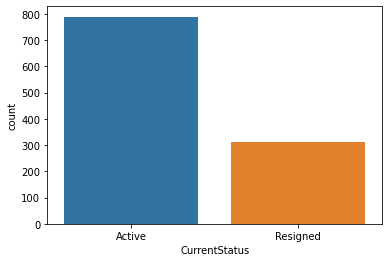

In [64]:
sns.countplot(x='CurrentStatus', data=Final)
plt.show()

In [65]:
Final["CurrentStatus"].value_counts()
Final.CurrentStatus.value_counts(normalize=True)
Final.CurrentStatus.value_counts(normalize=True).mul(100).round(3).astype(str) + '%'

Active      71.727%
Resigned    28.273%
Name: CurrentStatus, dtype: object

# 2.Employee Position
### Does Employee Position affects the attriton?

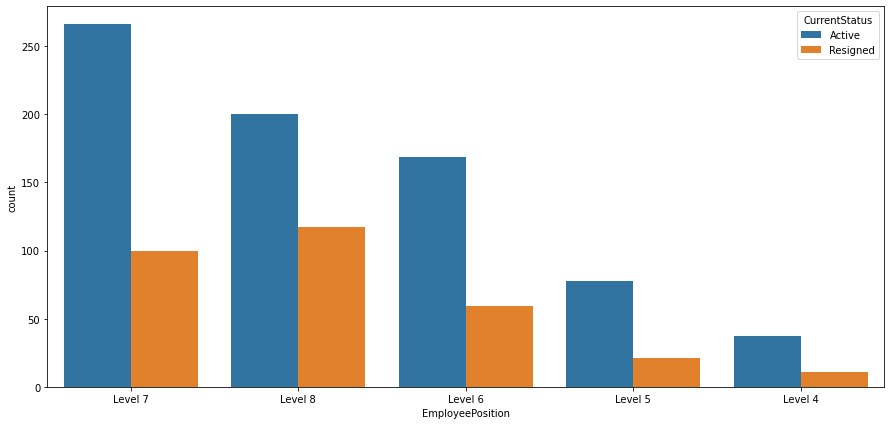

In [66]:
dsa1 = Final.EmployeePosition.value_counts().iloc[:5].index

plt.figure(figsize=(15,7))
sns.countplot(x='EmployeePosition', 
              data=Final, 
              order=dsa1, 
              hue='CurrentStatus')
plt.show()

Text(0.5, 1.0, 'Level 6')

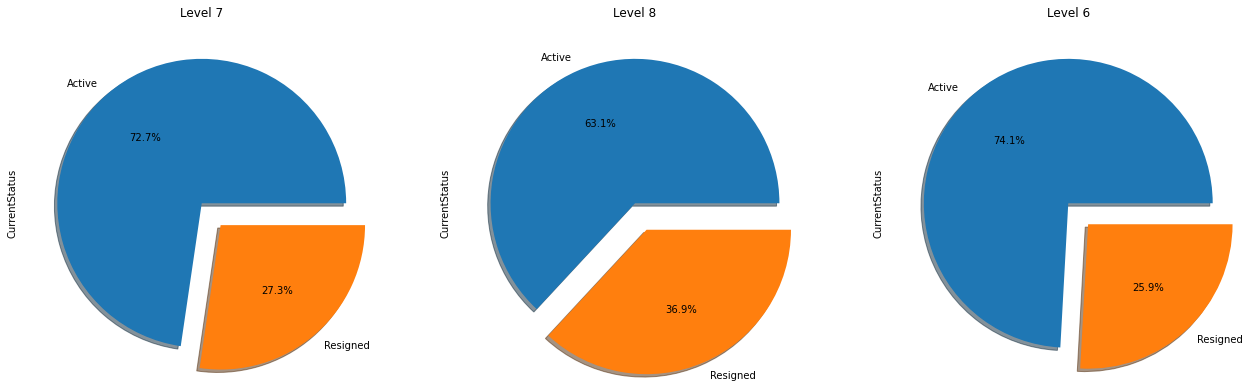

In [67]:
f,ax=plt.subplots(1,3,figsize=(22,7))
Final['CurrentStatus'][Final['EmployeePosition']=='Level 7'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
Final['CurrentStatus'][Final['EmployeePosition']=='Level 8'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)
Final['CurrentStatus'][Final['EmployeePosition']=='Level 6'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[2],shadow=True)
ax[0].set_title('Level 7')
ax[1].set_title('Level 8')
ax[2].set_title('Level 6')

Here we can predict that employees who are working at lower level(8 and 7) are mostly like to resign. as they are not getting career growth which they have further mentioned in their reason to leave the company in 3rd datafile

# 3.PeopleGroup 

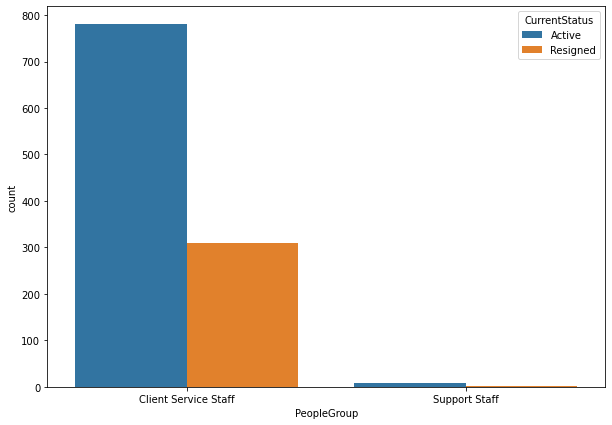

In [68]:
plt.figure(figsize=(10,7))
sns.countplot(x='PeopleGroup', 
              data=Final,  
              hue='CurrentStatus')
plt.show()

Text(0.5, 1.0, 'Support Staff')

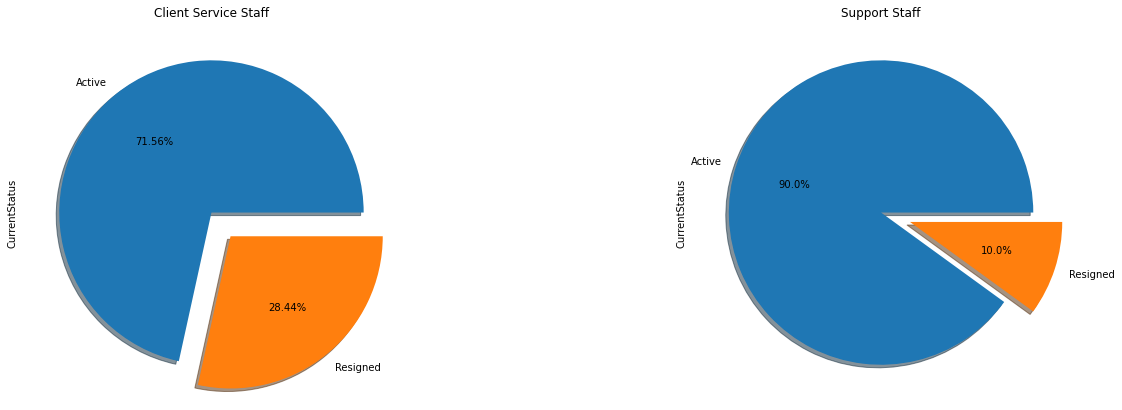

In [69]:
f,ax=plt.subplots(1,2,figsize=(22,7))
Final['CurrentStatus'][Final['PeopleGroup']=='Client Service Staff'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.2f%%',ax=ax[0],shadow=True)
Final['CurrentStatus'][Final['PeopleGroup']=='Support Staff'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)

ax[0].set_title('Client Service Staff')
ax[1].set_title('Support Staff')

# 4.Profit Center
### Which "Profit Center" has the most  regisned employees ?

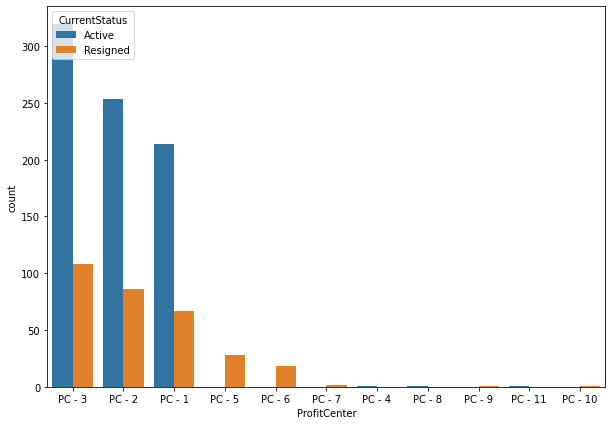

In [70]:
pr5 = Final.ProfitCenter.value_counts().iloc[:].index

plt.figure(figsize=(10,7))
sns.countplot(x='ProfitCenter', 
              data=Final,
              order=pr5,
              hue='CurrentStatus')
plt.show()

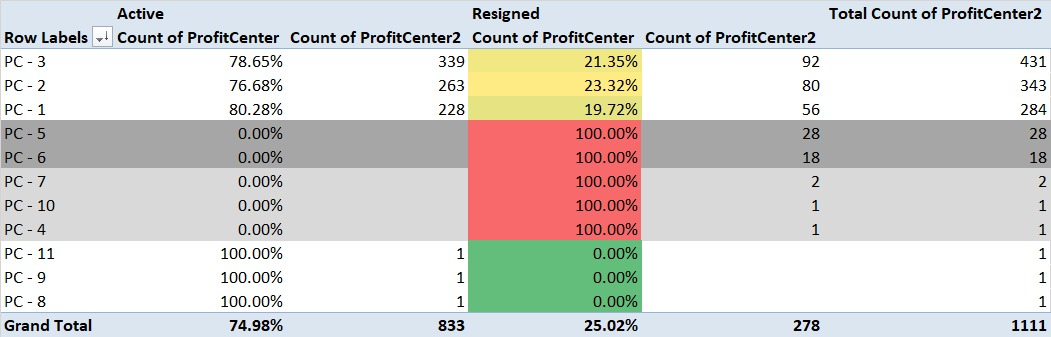

#  5.Supervisor Name
### Which Supervisor has the least attrition of employee ?

<AxesSubplot:xlabel='Supervisorname', ylabel='count'>

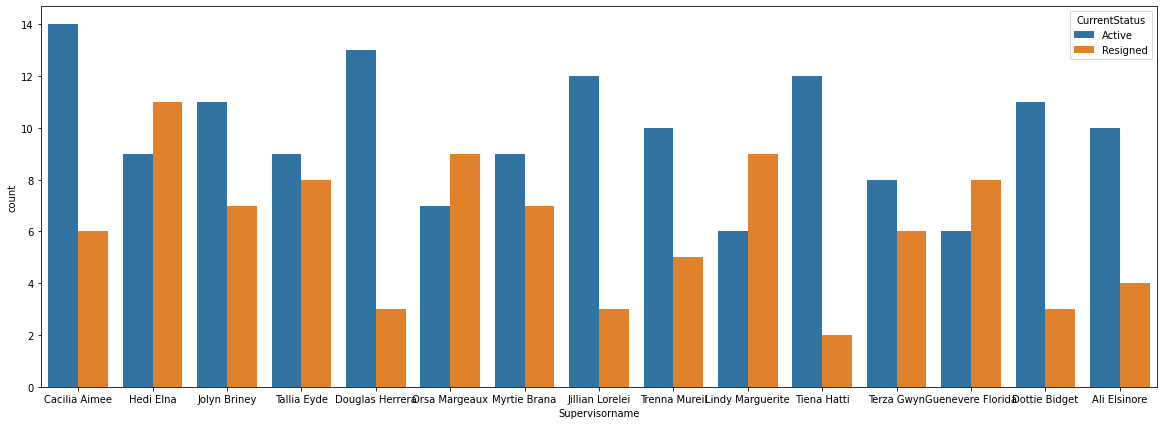

In [71]:
sup1 = Final.Supervisorname.value_counts().iloc[:15].index

plt.figure(figsize=(20,7))
sns.countplot(x='Supervisorname',
              order=sup1,
              data=Final,
              hue='CurrentStatus')

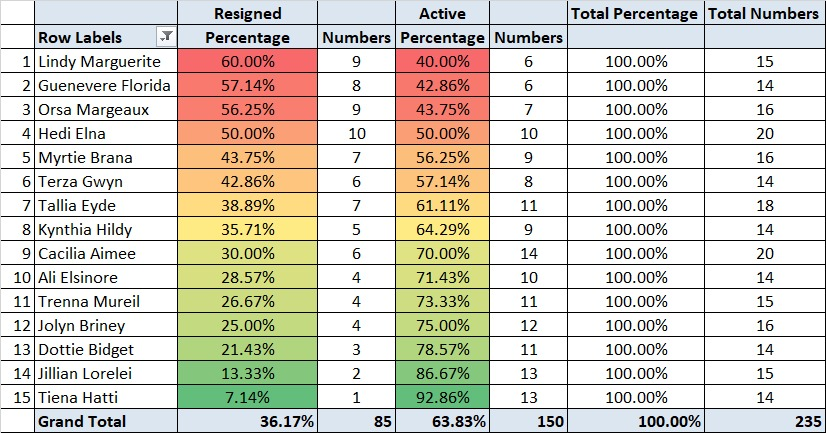

These are the top 15 supervisor under whom supervision, the employees have resigned the most. as you can see, from the above table that for top 5 supervisor. the employees who have resigned are more than the employees who are currently working. 

# 6.Employee Location
### Does "Employee Location" affects the attriton?

<AxesSubplot:xlabel='EmployeeLocation', ylabel='count'>

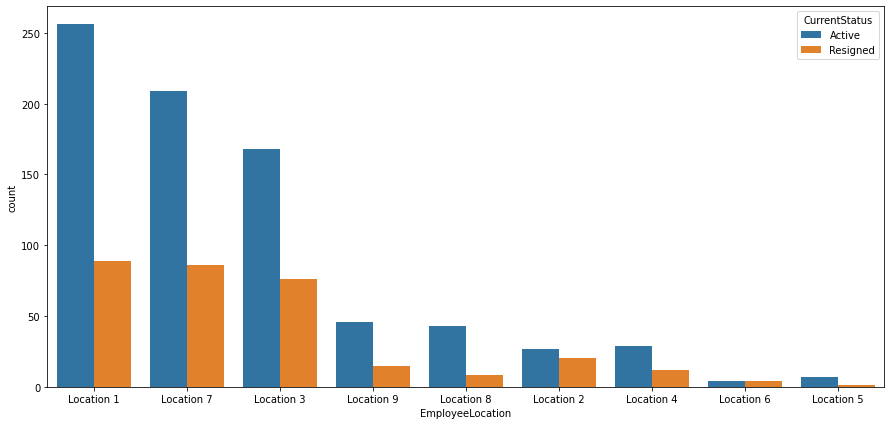

In [72]:
eloc1 = Final.EmployeeLocation.value_counts().iloc[:20].index

plt.figure(figsize=(15,7))
sns.countplot(x='EmployeeLocation',
              order=eloc1,
              data=Final,
              hue='CurrentStatus')

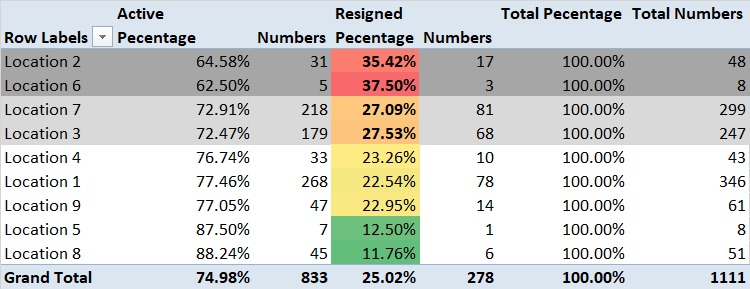

# Feature Selection/Engineering 
Converting Dataframe(df) into feat


In [73]:
feat = Final.copy()

In [74]:
feat.head()

,EmployeeNo,ProfitCenter,EmployeeName,EmployeePosition,EmployeeLocation,PeopleGroup,Supervisorname,JoinDate,CurrentStatus,Utilization%.12,TotalHours.12,TotalAvailableHours.12,WorkHours.12,LeaveHours.12,TrainingHours.12,BDHours.12,NCHours.12
0,1,PC - 1,Rochette Jilleen,Level 1,Location 3,Client Service Staff,Idalina Lauraine,2000-09-30,Active,0.240279,173.333333,155.375000,37.333333,15.666667,2.291667,119.291667,1.500000
1,2,PC - 2,Daryl Natalina,Level 2,Location 7,Client Service Staff,Idalina Lauraine,1999-05-31,Active,0.386510,173.333333,155.666667,60.166667,17.333333,0.333333,50.041667,49.708333
2,3,PC - 2,Annnora Gabrielle,Level 2,Location 7,Client Service Staff,Idalina Lauraine,2001-01-31,Active,0.681977,173.333333,143.333333,97.750000,28.166667,1.833333,38.625000,29.791667
3,4,PC - 3,Barbee Joey,Level 2,Location 1,Client Service Staff,Idalina Lauraine,2000-09-30,Resigned,0.166413,153.333333,136.708333,22.750000,16.333333,0.291667,113.416667,2.000000
4,5,PC - 4,Idalina Lauraine,Level 1,Location 3,Client Service Staff,Abagail Druci,1998-06-30,Active,0.123651,109.333333,100.416667,12.416667,8.666667,0.250000,96.583333,68.166667


### Droping:
    EmployeeNo
    JoinDate

In [75]:
feat.drop(columns= ['EmployeeNo','JoinDate'],inplace=True)

In [76]:
feat.drop(columns= ['EmployeeName'],inplace=True)

In [77]:
feat.head()

,ProfitCenter,EmployeePosition,EmployeeLocation,PeopleGroup,Supervisorname,CurrentStatus,Utilization%.12,TotalHours.12,TotalAvailableHours.12,WorkHours.12,LeaveHours.12,TrainingHours.12,BDHours.12,NCHours.12
0,PC - 1,Level 1,Location 3,Client Service Staff,Idalina Lauraine,Active,0.240279,173.333333,155.375000,37.333333,15.666667,2.291667,119.291667,1.500000
1,PC - 2,Level 2,Location 7,Client Service Staff,Idalina Lauraine,Active,0.386510,173.333333,155.666667,60.166667,17.333333,0.333333,50.041667,49.708333
2,PC - 2,Level 2,Location 7,Client Service Staff,Idalina Lauraine,Active,0.681977,173.333333,143.333333,97.750000,28.166667,1.833333,38.625000,29.791667
3,PC - 3,Level 2,Location 1,Client Service Staff,Idalina Lauraine,Resigned,0.166413,153.333333,136.708333,22.750000,16.333333,0.291667,113.416667,2.000000
4,PC - 4,Level 1,Location 3,Client Service Staff,Abagail Druci,Active,0.123651,109.333333,100.416667,12.416667,8.666667,0.250000,96.583333,68.166667


### Binarification of PeopleGroup

In [78]:
feat.PeopleGroup.value_counts()

Client Service Staff    1090
Support Staff             10
Name: PeopleGroup, dtype: int64

In [79]:
feat['PeopleGroup']=feat['PeopleGroup'].map({'Support Staff':0,'Client Service Staff':1})

In [80]:
feat.PeopleGroup.value_counts()

1    1090
0      10
Name: PeopleGroup, dtype: int64

### Binarification of CurrentStatus

In [81]:
feat.CurrentStatus.value_counts()

Active      789
Resigned    311
Name: CurrentStatus, dtype: int64

In [82]:
feat['CurrentStatus']=feat['CurrentStatus'].map({'Resigned':0,'Active':1})

In [83]:
feat.CurrentStatus.value_counts()

1    789
0    311
Name: CurrentStatus, dtype: int64

In [84]:
feat.head()

,ProfitCenter,EmployeePosition,EmployeeLocation,PeopleGroup,Supervisorname,CurrentStatus,Utilization%.12,TotalHours.12,TotalAvailableHours.12,WorkHours.12,LeaveHours.12,TrainingHours.12,BDHours.12,NCHours.12
0,PC - 1,Level 1,Location 3,1,Idalina Lauraine,1,0.240279,173.333333,155.375000,37.333333,15.666667,2.291667,119.291667,1.500000
1,PC - 2,Level 2,Location 7,1,Idalina Lauraine,1,0.386510,173.333333,155.666667,60.166667,17.333333,0.333333,50.041667,49.708333
2,PC - 2,Level 2,Location 7,1,Idalina Lauraine,1,0.681977,173.333333,143.333333,97.750000,28.166667,1.833333,38.625000,29.791667
3,PC - 3,Level 2,Location 1,1,Idalina Lauraine,0,0.166413,153.333333,136.708333,22.750000,16.333333,0.291667,113.416667,2.000000
4,PC - 4,Level 1,Location 3,1,Abagail Druci,1,0.123651,109.333333,100.416667,12.416667,8.666667,0.250000,96.583333,68.166667


## Converting dataframe(feat) into dummies

In [85]:
dummies = pd.get_dummies(feat.ProfitCenter)
dummies.head(3)

,PC - 1,PC - 10,PC - 11,PC - 2,PC - 3,PC - 4,PC - 5,PC - 6,PC - 7,PC - 8,PC - 9
0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0


In [86]:
dummies1 = pd.get_dummies(feat.EmployeePosition)
dummies2 = pd.get_dummies(feat.EmployeeLocation)
# dummies3 = pd.get_dummies(feat.PeopleGroup)
dummies4 = pd.get_dummies(feat.Supervisorname)

In [87]:
feat = pd.concat([feat,dummies,dummies1,dummies2,dummies4],axis='columns')
feat.head(3)

,ProfitCenter,EmployeePosition,EmployeeLocation,PeopleGroup,Supervisorname,CurrentStatus,Utilization%.12,TotalHours.12,TotalAvailableHours.12,WorkHours.12,LeaveHours.12,TrainingHours.12,BDHours.12,NCHours.12,PC - 1,PC - 10,PC - 11,PC - 2,PC - 3,PC - 4,PC - 5,PC - 6,PC - 7,PC - 8,PC - 9,Level 1,Level 10,Level 2,Level 3,Level 4,Level 5,Level 6,Level 7,Level 8,Level A1,Level A2,Level A3,Location 1,Location 2,Location 3,Location 4,Location 5,Location 6,Location 7,Location 8,Location 9,Abagail Druci,Aeriela Elonore,Agata Theodosia,Agnes Stacie,Ailyn Marie-Ann,Aimil Latisha,Ali Elsinore,Alvinia Ede,Annnora Gabrielle,Ardys Katerine,Audi Stephana,Barbee Joey,Benedikta Kirbee,Bernice Andrea,Beryle Lisha,Beverley Laney,Blair Dinny,Blondy Tatiania,Cacilia Aimee,Cassandra Katerina,Cherise Lainey,Cherry Fancie,Chris Ricky,Christina Desdemona,Claudia Meaghan,Cody Ashlan,Conni Athene,Cordey Sofia,Cordula Devan,Cortney Wanids,Cosette Lavena,Cristina Maren,Cynthia Leonora,Danette Melinda,Dannie Clotilda,Daryl Natalina,Deloris Gabriella,Dionne Ronna,Donette Verne,Dore Natalya,Dorotea Inger,Dottie Bidget,Douglas Herrera,Em Cacilie,Emelda Jackqueline,Erminie Ericka,Eydie Francine,Ezmeralda Nisse,Frances Mignonne,Gavra Kayle,Genvieve Celeste,Gert Editha,Gisella Nickie,Grata Rochella,Guenevere Florida,Hedi Elna,Hedwiga Mehetabel,Idalina Lauraine,Ilsa Marigold,Imelda Madalena,Iormina Lucienne,Irene Candis,Isahella Gwendolin,Jamiya Sellers,Jaylin Berg,Jillana Vivi,Jillian Lorelei,Johan Gaines,Jolyn Briney,Jordanna Danya,Josey Rorie,Josi Ula,Kali Gwendolyn,Kalie Sylvia,Kalindi Toma,Kathye Edna,Kati Rosalyn,Katuscha Pru,Kevin Perez,Kippy Marquita,Klarrisa Theresita,Kristina Alleen,Kynthia Hildy,Laetitia Yoshi,Landon Browning,Lane Ailina,Latosha Bierbaum,Lee Alfie,Leilah Nanni,Lenora Nydia,Leonanie Lexine,Lian Harley,Libbey Rita,Libby Bowen,Lindy Marguerite,Luciana Erika,Madden Galvan,Margo Opaline,Maria Aubrey,Marina Garnette,Marleah Bernadina,Marne Linn,Marney Anderea,Marris Gilda,Marys Essy,Mathilda Tomi,Mira Fiorenze,Misti Helena,Moira Vivien,Morgen Hailee,Myrtie Brana,Nancee Deirdre,Naomi Rebekah,Nerissa Jackquelin,Nerita Anet,Nikolia Shirl,Ophelie Jyoti,Orelee Hanna,Oriana Tabby,Orsa Margeaux,Pamelina Shalna,Philippe Kizzie,Prudi Delly,Refugia Morganti,Revkah Stephie,Rina Debee,Rochette Jilleen,Rosabel Saidee,Rosabella Arlina,Rosalynd Catina,Ruthe Bellina,Sheila Papagena,Sile Lorrie,Stacey Cassey,Sybil Georgianna,Talia Bautista,Tallia Eyde,Tallulah Kassia,Tatiana Roxanna,Terza Gwyn,Tiena Hatti,Tommy Muire,Trenna Mureil,Trudey Lissi,Vanessa Zingaro,Vinni Calypso,Vonni Bethena,Willette Lil,Xylina Beatriz,Yolanthe Laurella,Zaneta Arlette,Zaria Dawn
0,PC - 1,Level 1,Location 3,1,Idalina Lauraine,1,0.240279,173.333333,155.375000,37.333333,15.666667,2.291667,119.291667,1.500000,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,PC - 2,Level 2,Location 7,1,Idalina Lauraine,1,0.386510,173.333333,155.666667,60.166667,17.333333,0.333333,50.041667,49.708333,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,PC - 2,Level 2,Location 7,1,Idalina Lauraine,1,0.681977,173.333333,143.333333,97.750000,28.166667,1.833333,38.625000,29.791667,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,

In [88]:
feat.shape

(1100, 198)

In [89]:
feat.drop(columns=["ProfitCenter","EmployeePosition","EmployeeLocation","Supervisorname"],inplace=True)

In [90]:
feat.shape

(1100, 194)

In [91]:
# Will Show TopX of the perticular Column
# Top30 = [x for x in Final.Supervisorname.value_counts().sort_values(ascending=False).head(30).index]
# Top30

In [92]:
feat.head()

,PeopleGroup,CurrentStatus,Utilization%.12,TotalHours.12,TotalAvailableHours.12,WorkHours.12,LeaveHours.12,TrainingHours.12,BDHours.12,NCHours.12,PC - 1,PC - 10,PC - 11,PC - 2,PC - 3,PC - 4,PC - 5,PC - 6,PC - 7,PC - 8,PC - 9,Level 1,Level 10,Level 2,Level 3,Level 4,Level 5,Level 6,Level 7,Level 8,Level A1,Level A2,Level A3,Location 1,Location 2,Location 3,Location 4,Location 5,Location 6,Location 7,Location 8,Location 9,Abagail Druci,Aeriela Elonore,Agata Theodosia,Agnes Stacie,Ailyn Marie-Ann,Aimil Latisha,Ali Elsinore,Alvinia Ede,Annnora Gabrielle,Ardys Katerine,Audi Stephana,Barbee Joey,Benedikta Kirbee,Bernice Andrea,Beryle Lisha,Beverley Laney,Blair Dinny,Blondy Tatiania,Cacilia Aimee,Cassandra Katerina,Cherise Lainey,Cherry Fancie,Chris Ricky,Christina Desdemona,Claudia Meaghan,Cody Ashlan,Conni Athene,Cordey Sofia,Cordula Devan,Cortney Wanids,Cosette Lavena,Cristina Maren,Cynthia Leonora,Danette Melinda,Dannie Clotilda,Daryl Natalina,Deloris Gabriella,Dionne Ronna,Donette Verne,Dore Natalya,Dorotea Inger,Dottie Bidget,Douglas Herrera,Em Cacilie,Emelda Jackqueline,Erminie Ericka,Eydie Francine,Ezmeralda Nisse,Frances Mignonne,Gavra Kayle,Genvieve Celeste,Gert Editha,Gisella Nickie,Grata Rochella,Guenevere Florida,Hedi Elna,Hedwiga Mehetabel,Idalina Lauraine,Ilsa Marigold,Imelda Madalena,Iormina Lucienne,Irene Candis,Isahella Gwendolin,Jamiya Sellers,Jaylin Berg,Jillana Vivi,Jillian Lorelei,Johan Gaines,Jolyn Briney,Jordanna Danya,Josey Rorie,Josi Ula,Kali Gwendolyn,Kalie Sylvia,Kalindi Toma,Kathye Edna,Kati Rosalyn,Katuscha Pru,Kevin Perez,Kippy Marquita,Klarrisa Theresita,Kristina Alleen,Kynthia Hildy,Laetitia Yoshi,Landon Browning,Lane Ailina,Latosha Bierbaum,Lee Alfie,Leilah Nanni,Lenora Nydia,Leonanie Lexine,Lian Harley,Libbey Rita,Libby Bowen,Lindy Marguerite,Luciana Erika,Madden Galvan,Margo Opaline,Maria Aubrey,Marina Garnette,Marleah Bernadina,Marne Linn,Marney Anderea,Marris Gilda,Marys Essy,Mathilda Tomi,Mira Fiorenze,Misti Helena,Moira Vivien,Morgen Hailee,Myrtie Brana,Nancee Deirdre,Naomi Rebekah,Nerissa Jackquelin,Nerita Anet,Nikolia Shirl,Ophelie Jyoti,Orelee Hanna,Oriana Tabby,Orsa Margeaux,Pamelina Shalna,Philippe Kizzie,Prudi Delly,Refugia Morganti,Revkah Stephie,Rina Debee,Rochette Jilleen,Rosabel Saidee,Rosabella Arlina,Rosalynd Catina,Ruthe Bellina,Sheila Papagena,Sile Lorrie,Stacey Cassey,Sybil Georgianna,Talia Bautista,Tallia Eyde,Tallulah Kassia,Tatiana Roxanna,Terza Gwyn,Tiena Hatti,Tommy Muire,Trenna Mureil,Trudey Lissi,Vanessa Zingaro,Vinni Calypso,Vonni Bethena,Willette Lil,Xylina Beatriz,Yolanthe Laurella,Zaneta Arlette,Zaria Dawn
0,1,1,0.240279,173.333333,155.375000,37.333333,15.666667,2.291667,119.291667,1.500000,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0.386510,173.333333,155.666667,60.166667,17.333333,0.333333,50.041667,49.708333,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0.681977,173.333333,143.333333,97.750000,28.166667,1.833333,38.625000,29.791667,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0.166413,153.333333,1

### Preparing Dataset for Machine learning Algorithm
1. Seprating target vs input columns
2. Train & Test Split
3. Confusion matrix

### Seprating target vs input columns

In [93]:
target = feat['CurrentStatus']                     
inputs = feat.drop(columns=['CurrentStatus']) 

# Train & Test Split
Spliting the dataframe(feat) into trainning and test set.

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc_score

In [95]:
x_train, x_test, y_train, y_test = train_test_split(inputs,target,train_size=0.85,stratify=target,random_state=2)

In [96]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(935, 193) (935,)
(165, 193) (165,)


### Confusion Matrix

In [97]:
# Validation
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,log_loss,f1_score

In [98]:
def validation(test,pred):
    print('Confusion Matrix:\n',confusion_matrix(test,pred))
    print('Acuuracy:',accuracy_score(test,pred))
    print('Recall:',recall_score(test,pred))
    print('Precision:',precision_score(test,pred))
    print('F1 Score:',f1_score(test,pred))

# Naive Bayes

In [99]:
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()

In [100]:
model_nb.fit(x_train,y_train)

GaussianNB()

### Model.score

### On Train set 

In [101]:
model_nb.score(x_train, y_train)

0.6160427807486631

In [102]:
y_train_pred_nb = model_nb.predict(x_train)

In [103]:
validation(y_train,y_train_pred_nb)

Confusion Matrix:
 [[248  16]
 [343 328]]
Acuuracy: 0.6160427807486631
Recall: 0.488822652757079
Precision: 0.9534883720930233
F1 Score: 0.6463054187192118


### On Test Set

In [104]:
model_nb.score(x_test, y_test)

0.5393939393939394

In [105]:
y_pred_nb = model_nb.predict(x_test)

In [106]:
validation(y_test,y_pred_nb)

Confusion Matrix:
 [[36 11]
 [65 53]]
Acuuracy: 0.5393939393939394
Recall: 0.4491525423728814
Precision: 0.828125
F1 Score: 0.5824175824175823


# Logistic Regression 

In [123]:
from sklearn.linear_model import LogisticRegression

In [124]:
model_log =  LogisticRegression()

### Training the LogisticRegression model with training data

In [125]:
model_log.fit(x_train,y_train)

LogisticRegression()

### Model Evaluation 

In [126]:
from sklearn.metrics import accuracy_score as acc

### Accuracy on training data

In [127]:
x_train_pred = model_log.predict(x_train)
train_data_acc = acc(x_train_pred,y_train)

In [128]:
print("Train data Accuracy score: ",train_data_acc)

Train data Accuracy score:  0.8524064171122995


### Accuracy on test data

In [129]:
x_test_pred = model_log.predict(x_test)
test_data_acc = acc(x_test_pred,y_test)

In [130]:
print("Test data Accuracy score: ",test_data_acc)

Test data Accuracy score:  0.8787878787878788


In [131]:
validation(x_test_pred,y_test)

Confusion Matrix:
 [[ 30   3]
 [ 17 115]]
Acuuracy: 0.8787878787878788
Recall: 0.8712121212121212
Precision: 0.9745762711864406
F1 Score: 0.92


# Decision Tree

In [107]:
from sklearn.model_selection import GridSearchCV

In [108]:
from sklearn.tree import DecisionTreeClassifier

In [109]:
model_dt = DecisionTreeClassifier()

In [110]:
param = {'criterion': ['gini','entropy'],
         'max_depth': [2,3,4,5,6,7],
        'max_features':[2,3,4,5,6,7]}

In [111]:
gscv = GridSearchCV(estimator=model_dt,
                   param_grid=param,
                   scoring='accuracy',
                   verbose=3)

In [112]:
gscv.fit(x_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END criterion=gini, max_depth=2, max_features=2;, score=0.717 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=2;, score=0.706 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=2;, score=0.717 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=2;, score=0.727 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, max_features=2;, score=0.722 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, max_features=3;, score=0.717 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=3;, score=0.717 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=3;, score=0.717 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=3;, score=0.717 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, max_features=3;, score=0.727 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth

[CV 3/5] END criterion=gini, max_depth=5, max_features=2;, score=0.722 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=2;, score=0.791 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=2;, score=0.733 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=3;, score=0.733 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=3;, score=0.717 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=3;, score=0.727 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=3;, score=0.840 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=3;, score=0.727 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=4;, score=0.717 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=4;, score=0.765 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=4;, score=0.727 total time=   0.0s
[CV 4/5] E

[CV 4/5] END criterion=entropy, max_depth=2, max_features=3;, score=0.717 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=3;, score=0.711 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=4;, score=0.717 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=4;, score=0.727 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=4;, score=0.717 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=4;, score=0.711 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=4;, score=0.717 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=5;, score=0.717 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=5;, score=0.717 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=5;, score=0.717 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=5;, score=0.

[CV 2/5] END criterion=entropy, max_depth=5, max_features=5;, score=0.872 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=5;, score=0.722 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=5;, score=0.888 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=5;, score=0.797 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=6;, score=0.866 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=6;, score=0.807 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=6;, score=0.775 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=6;, score=0.824 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=6;, score=0.706 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=7;, score=0.717 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=7;, score=0.

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7],
                         'max_features': [2, 3, 4, 5, 6, 7]},
             scoring='accuracy', verbose=3)

In [113]:
gscv.best_score_

0.8449197860962567

In [114]:
gscv.predict_proba(x_test[:10])

array([[0.13235294, 0.86764706],
       [0.29308005, 0.70691995],
       [0.29308005, 0.70691995],
       [0.29308005, 0.70691995],
       [0.29308005, 0.70691995],
       [0.29308005, 0.70691995],
       [0.29308005, 0.70691995],
       [0.        , 1.        ],
       [0.29308005, 0.70691995],
       [0.        , 1.        ]])

In [115]:
gscv.best_params_

{'criterion': 'gini', 'max_depth': 6, 'max_features': 7}

In [116]:
model_dt = DecisionTreeClassifier(**gscv.best_params_)

In [117]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, max_features=7)

# Model_dt.score

In [118]:
model_dt.score(x_test,y_test)

0.7696969696969697

In [119]:
y_pred_dt = model_dt.predict(x_test)

In [120]:
validation(y_test,y_pred_dt)

Confusion Matrix:
 [[29 18]
 [20 98]]
Acuuracy: 0.7696969696969697
Recall: 0.8305084745762712
Precision: 0.8448275862068966
F1 Score: 0.8376068376068375


In [121]:
from sklearn import tree

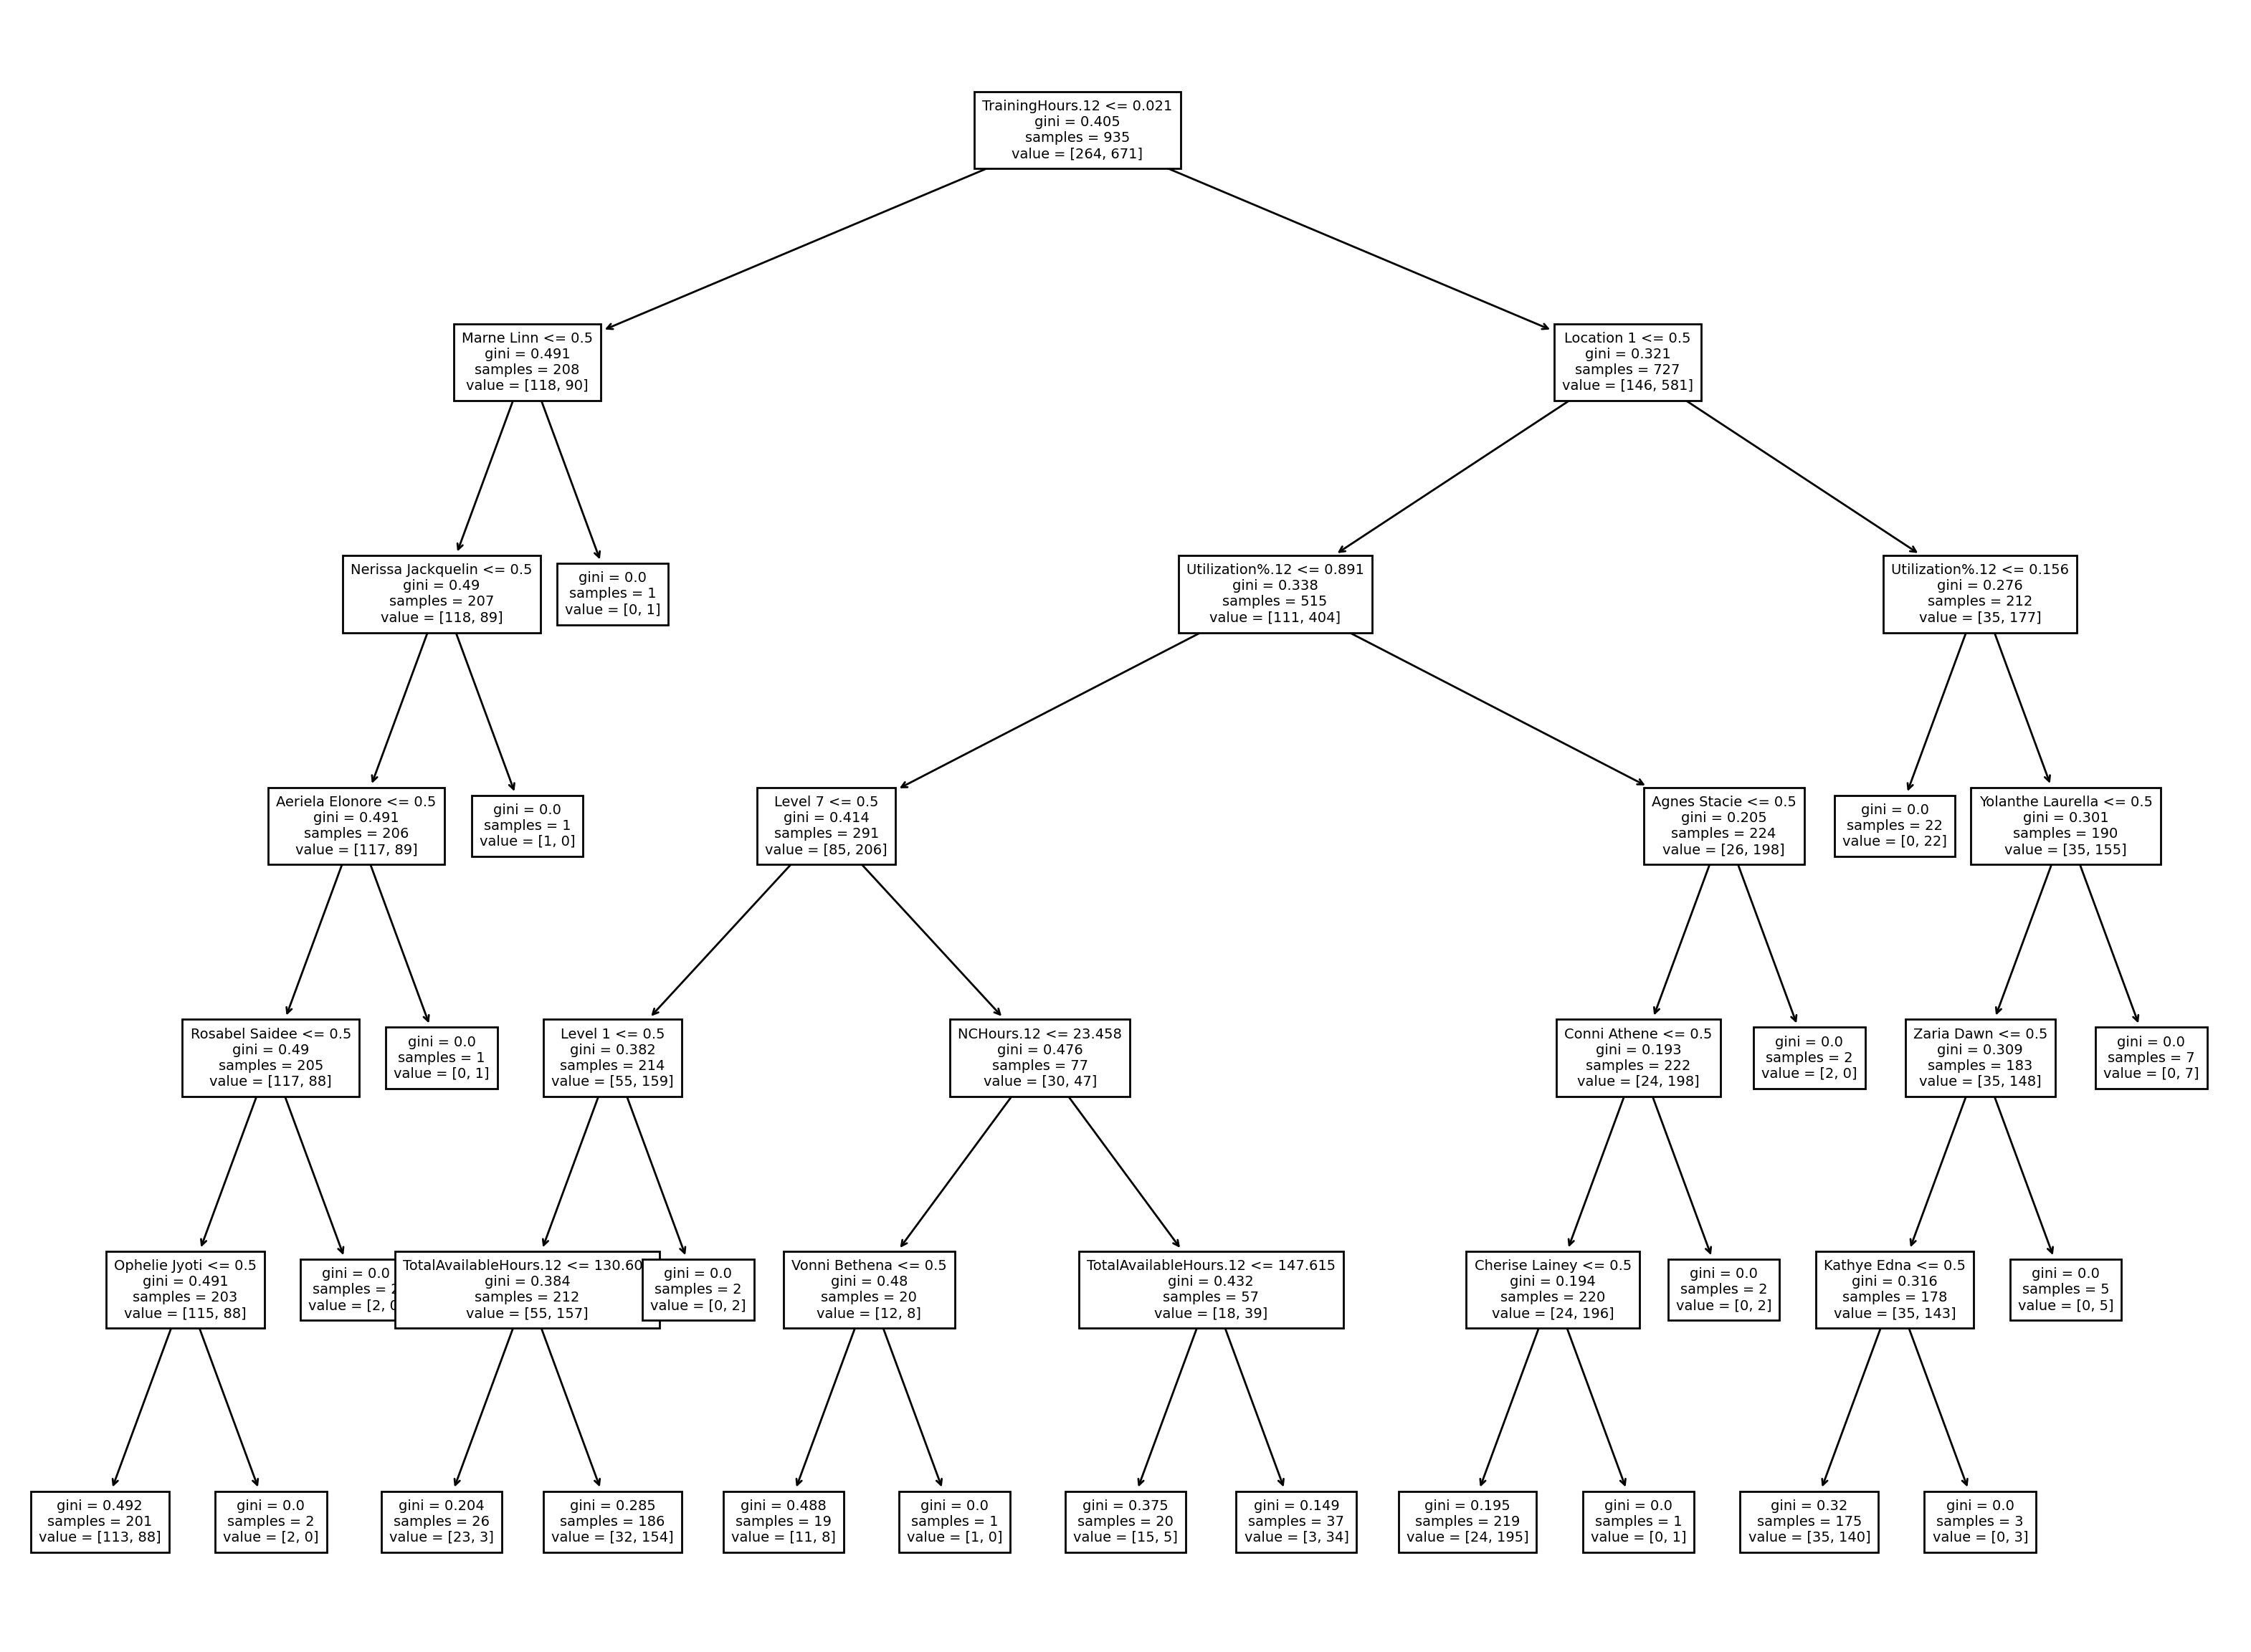

In [122]:
plt.figure(figsize=(20,15),dpi=200)
tree.plot_tree(model_dt,feature_names=x_train.columns,fontsize=7)

plt.show()

# Observation 
1. Decision tree is showing exceptionally good result. 
2. As considered, it is providing an overfit results. 
3. Hence we will move to Randomforest for more reliable results. 

# Random Forest Classification

In [132]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score as acc_score

import warnings
warnings.filterwarnings('ignore')

In [133]:
model_rf = RandomForestClassifier()

In [134]:
model_rf.fit(x_train, y_train)

RandomForestClassifier()

## Model Evaluation

### Accuracy Score on training data

In [135]:
# Accuracy on train data
x_train_pred = model_rf.predict(x_train)
train_data_acc = acc_score(x_train_pred,y_train)

In [136]:
print("Accuracy of train: ",train_data_acc)

Accuracy of train:  1.0


### Accuracy Score on test data

In [137]:
# Accuracy on test data
x_test_pred = model_rf.predict(x_test)
test_data_acc = acc_score(x_test_pred,y_test)

In [138]:
print("Accuracy of test: ",test_data_acc)

Accuracy of test:  0.9212121212121213


# Confusion Matrix Score

In [139]:
validation(x_test_pred,y_test)

Confusion Matrix:
 [[ 36   2]
 [ 11 116]]
Acuuracy: 0.9212121212121213
Recall: 0.9133858267716536
Precision: 0.9830508474576272
F1 Score: 0.9469387755102041
